<a href="https://colab.research.google.com/github/JSEFERINO/UdeA/blob/main/02_Semana2_C_Datos_Docentes_Bolivar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

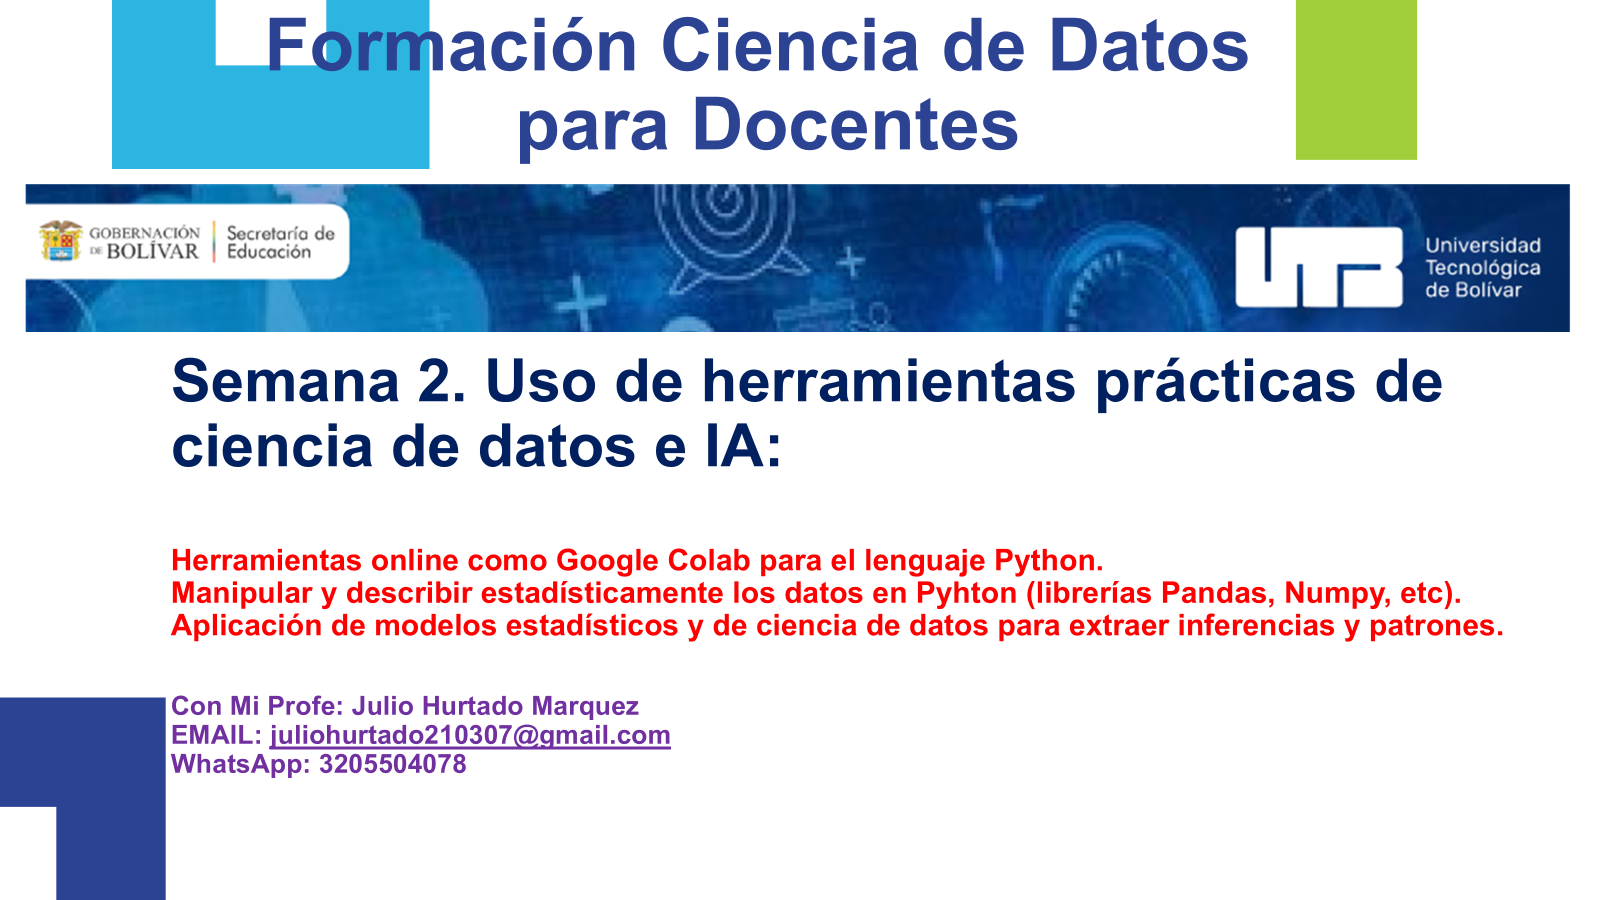


# **Video Semana 2: https://youtu.be/V5_eaqnQDKw**

# **1. Acerca de las _Tablas de frecuencias agrupadas_**
+ **Son una herramienta estadística que permite organizar grandes conjuntos de datos cuantitativos dividiéndolos en clases o intervalos y calculando cuántas observaciones caen dentro de cada clase. Esto ayuda a visualizar la distribución de los datos y facilita el análisis de tendencias.**

### **Componentes clave de una tabla de frecuencias agrupadas**:

1. **Intervalos de clase**:
   - Los datos se dividen en rangos o intervalos (clases), cada uno de los cuales abarca un rango de valores. Los intervalos deben ser **contiguos** y **no superpuestos**.
   - Cada intervalo tiene un límite inferior y un límite superior. La **amplitud de clase** es la diferencia entre estos límites y es constante (o similar) en la mayoría de los casos.

2. **Frecuencia absoluta (fᵢ)**:
   - Es el número de observaciones que caen dentro de cada intervalo de clase. Se denota comúnmente como $f_i$.

3. **Frecuencia acumulada (Fᵢ)**:
   - Es la suma de las frecuencias absolutas de todas las clases anteriores, incluida la clase actual. Representa cuántos datos se han acumulado hasta ese punto.
   - Se usa para calcular posiciones relativas como cuantiles, percentiles, etc.

4. **Frecuencia relativa (frᵢ)**:
   - Es la proporción de observaciones que caen en cada intervalo de clase, en relación con el total de observaciones. Se calcula como $fr_i = \frac{f_i}{N}$, donde $N$ es el tamaño total de la muestra.

5. **Frecuencia relativa acumulada**:
   - Es la acumulación de las frecuencias relativas, útil para conocer la proporción de datos que están por debajo de un cierto valor.

6. **Marca de clase (Xᵢ)**:
   - Es el **punto medio** del intervalo de clase y se usa para cálculos de medidas como la **media**. Se obtiene sumando el límite inferior y superior del intervalo y dividiendo por dos:
   $$
   X_i = \frac{L_{\text{inf}} + L_{\text{sup}}}{2}
   $$

### **7. Ejemplo de tabla de frecuencias agrupadas:**

| Intervalos de clase | Frecuencia absoluta $f_i$ | Frecuencia acumulada $F_i $ | Frecuencia relativa $fr_i$ | Marca de clase $X_i$ |
|:---------------------:|:-------------------------------:|:-------------------------------:|:-------------------------------:|:--------------------------:|
| 10 - 20             | 5                             | 5                             | 0.10                          | 15                       |
| 20 - 30             | 8                             | 13                            | 0.16                          | 25                       |
| 30 - 40             | 12                            | 25                            | 0.24                          | 35                       |
| 40 - 50             | 10                            | 35                            | 0.20                          | 45                       |
| 50 - 60             | 15                            | 50                            | 0.30                          | 55                       |

### 8. **Propósitos de una tabla de frecuencias agrupadas**:
- **Resumir datos**: en lugar de analizar cada dato individualmente, se agrupan los datos en clases, lo que proporciona una vista más compacta.
- **Visualizar la distribución**: permite observar la forma en que los datos están distribuidos, facilitando la identificación de tendencias, sesgos o agrupamientos.
- **Calcular medidas estadísticas**: como la **media**, **mediana**, **moda**, **desviación estándar**, etc., utilizando la frecuencia y la marca de clase.

### **9. Importancia de las tablas de frecuencias agrupadas:**
- Son muy útiles para conjuntos de datos grandes.
- Facilitan el cálculo de medidas de tendencia central y dispersión.
- Permiten la representación gráfica mediante **histogramas**.

***Estas tablas proporcionan una base sólida para el análisis exploratorio de datos y la toma de decisiones informadas sobre el comportamiento de un conjunto de datos.***

In [ ]:
import pandas as pd
import numpy as np
# @title **2. Importando las librerias a necesitar**
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns
import scipy.stats as stats
from pandas.plotting import register_matplotlib_converters



In [ ]:
# @title **3. Exportamos nuestra última base de datos**
df_datos2 = pd.read_csv("/content/df_datos_LIMPIOS2.csv", delimiter=',')
df_datos2.head()

,CURSO,ASISTENCIA,PROGRAMA,EDAD,URBANO,PESO,ESTATURA,TRANSPORTE,SEXO,ESTRATO,GR_SANGUINEO,DEFINITIVA
0,ESTADISTICA I,50,PSICOLOGÍA,19,SI,45,163,Mototaxi,Femenino,II,O positivo,4.5
1,PROBABILIDAD,50,FINANZAS,18,SI,56,160,Particular,Femenino,V,B positivo,4.5
2,PROBABILIDAD,35,FINANZAS,18,SI,67,173,Transcaribe,Femenino,IV,B positivo,1.5
3,PROBABILIDAD,60,FINANZAS,21,SI,69,180,Taxi,Masculino,V,O positivo,2.9
4,PROBABILIDAD,50,FINANZAS,18,SI,50,158,Taxi,Femenino,III,A positivo,2.6


In [ ]:
# @title **4. Tabla agrupada para la variable PESO**
datos_peso = df_datos2['PESO']

In [ ]:
# @title **Paso 3. Rango de los datos**
R = max(datos_peso) - min(datos_peso)
print(f"El rango de los datos es: R = {max(datos_peso)} - {min(datos_peso)} = {R}")

El rango de los datos es: R = 102 - 42 = 60


In [ ]:
# @title **Paso 4. Numero de intervalos con la Regla de Sturges $$k = 1 +3.322log(N)$$**
N = len(datos_peso) # Total de Datos
k = 1 + 3.322 * np.log10(N) # Número de intervalos
k = int(k)
print(f"El numero de intervalos es: k = 1 + 3.322 * log10({N}) = 1 + 3.322 * log10({N}) = {k}")

El numero de intervalos es: k = 1 + 3.322 * log10(76) = 1 + 3.322 * log10(76) = 7


In [ ]:
# @title **Paso 5. Amplitud de cada intervalo $$A = \frac{R}{k}$$**
A = R / k # Amplitud de cada intervalo
A = int(A)
print(f"La amplitud de cada intervalo es: A = R / k = {R} / {k} = {A}")

La amplitud de cada intervalo es: A = R / k = 60 / 7 = 8


In [ ]:
# @title **Paso 6. Definimos las clases o intervalos a usar**
clases = pd.cut(datos_peso, k)
clases = clases.value_counts().sort_index()
print(clases)

PESO
(41.94, 50.571]     11
(50.571, 59.143]    17
(59.143, 67.714]    24
(67.714, 76.286]    14
(76.286, 84.857]     7
(84.857, 93.429]     2
(93.429, 102.0]      1
Name: count, dtype: int64


In [ ]:
# @title **Paso 7. Crear tabla de frecuencias**
tabla_frecuencia = pd.DataFrame(clases)
tabla_frecuencia

,count
PESO,
"(41.94, 50.571]",11
"(50.571, 59.143]",17
"(59.143, 67.714]",24
"(67.714, 76.286]",14
"(76.286, 84.857]",7
"(84.857, 93.429]",2
"(93.429, 102.0]",1


In [ ]:
# @title **Paso 8. Crear tabla de frecuencias absolutas**
tabla_frecuencia.columns = ['Frecuencia absoluta (fᵢ)']
tabla_frecuencia

,Frecuencia absoluta (fᵢ)
PESO,
"(41.94, 50.571]",11
"(50.571, 59.143]",17
"(59.143, 67.714]",24
"(67.714, 76.286]",14
"(76.286, 84.857]",7
"(84.857, 93.429]",2
"(93.429, 102.0]",1


In [ ]:
# @title **Paso 9. Simplificando los intervalos**

tabla_frecuencia['Intervalos de clase'] = tabla_frecuencia.index
tabla_frecuencia['Intervalos de clase'] = tabla_frecuencia['Intervalos de clase'].apply(lambda x: f'[{round(x.left,1)}, {round(x.right,1)})')
print(tabla_frecuencia)

                  Frecuencia absoluta (fᵢ) Intervalos de clase
PESO                                                          
(41.94, 50.571]                         11        [41.9, 50.6)
(50.571, 59.143]                        17        [50.6, 59.1)
(59.143, 67.714]                        24        [59.1, 67.7)
(67.714, 76.286]                        14        [67.7, 76.3)
(76.286, 84.857]                         7        [76.3, 84.9)
(84.857, 93.429]                         2        [84.9, 93.4)
(93.429, 102.0]                          1       [93.4, 102.0)


In [ ]:
# @title **Paso 10. Cerrando el último intervalo**
ultimo_intervalo = tabla_frecuencia.index[-1]

# Aplicar el formato adecuado para cada intervalo
tabla_frecuencia['Intervalos de clase'] = tabla_frecuencia.index
tabla_frecuencia['Intervalos de clase'] = tabla_frecuencia['Intervalos de clase'].apply(
    lambda x: f'[{round(x.left,1)}, {round(x.right,1)}]' if x == ultimo_intervalo else f'[{round(x.left,1)}, {round(x.right,1)})'
)

print(tabla_frecuencia)


                  Frecuencia absoluta (fᵢ) Intervalos de clase
PESO                                                          
(41.94, 50.571]                         11        [41.9, 50.6)
(50.571, 59.143]                        17        [50.6, 59.1)
(59.143, 67.714]                        24        [59.1, 67.7)
(67.714, 76.286]                        14        [67.7, 76.3)
(76.286, 84.857]                         7        [76.3, 84.9)
(84.857, 93.429]                         2        [84.9, 93.4)
(93.429, 102.0]                          1       [93.4, 102.0]


In [ ]:
# @title **Paso 11. Calcular la marca de clase (Xᵢ)**
tabla_frecuencia['Marca de clase (Xᵢ)'] = [round(interval.mid,1) for interval in tabla_frecuencia.index]
print(tabla_frecuencia)

                  Frecuencia absoluta (fᵢ) Intervalos de clase  \
PESO                                                             
(41.94, 50.571]                         11        [41.9, 50.6)   
(50.571, 59.143]                        17        [50.6, 59.1)   
(59.143, 67.714]                        24        [59.1, 67.7)   
(67.714, 76.286]                        14        [67.7, 76.3)   
(76.286, 84.857]                         7        [76.3, 84.9)   
(84.857, 93.429]                         2        [84.9, 93.4)   
(93.429, 102.0]                          1       [93.4, 102.0]   

                  Marca de clase (Xᵢ)  
PESO                                   
(41.94, 50.571]                  46.3  
(50.571, 59.143]                 54.9  
(59.143, 67.714]                 63.4  
(67.714, 76.286]                 72.0  
(76.286, 84.857]                 80.6  
(84.857, 93.429]                 89.1  
(93.429, 102.0]                  97.7  


In [ ]:
# @title **Paso 12.  Calcular la frecuencia absoluta acumulada (Fᵢ)**
tabla_frecuencia['Frecuencia absoluta acumulada (Fᵢ)'] = tabla_frecuencia['Frecuencia absoluta (fᵢ)'].cumsum()
print(tabla_frecuencia)


                  Frecuencia absoluta (fᵢ) Intervalos de clase  \
PESO                                                             
(41.94, 50.571]                         11        [41.9, 50.6)   
(50.571, 59.143]                        17        [50.6, 59.1)   
(59.143, 67.714]                        24        [59.1, 67.7)   
(67.714, 76.286]                        14        [67.7, 76.3)   
(76.286, 84.857]                         7        [76.3, 84.9)   
(84.857, 93.429]                         2        [84.9, 93.4)   
(93.429, 102.0]                          1       [93.4, 102.0]   

                  Marca de clase (Xᵢ)  Frecuencia absoluta acumulada (Fᵢ)  
PESO                                                                       
(41.94, 50.571]                  46.3                                  11  
(50.571, 59.143]                 54.9                                  28  
(59.143, 67.714]                 63.4                                  52  
(67.714, 76.286]         

In [ ]:
# @title **Paso 13.  Calcular la frecuencia relativa (fᵢ) $f_r = \frac{f_i}{N}$**
tabla_frecuencia['Frecuencia relativa (fᵢ)'] = tabla_frecuencia['Frecuencia absoluta (fᵢ)'] / len(datos_peso)
print(tabla_frecuencia)


                  Frecuencia absoluta (fᵢ) Intervalos de clase  \
PESO                                                             
(41.94, 50.571]                         11        [41.9, 50.6)   
(50.571, 59.143]                        17        [50.6, 59.1)   
(59.143, 67.714]                        24        [59.1, 67.7)   
(67.714, 76.286]                        14        [67.7, 76.3)   
(76.286, 84.857]                         7        [76.3, 84.9)   
(84.857, 93.429]                         2        [84.9, 93.4)   
(93.429, 102.0]                          1       [93.4, 102.0]   

                  Marca de clase (Xᵢ)  Frecuencia absoluta acumulada (Fᵢ)  \
PESO                                                                        
(41.94, 50.571]                  46.3                                  11   
(50.571, 59.143]                 54.9                                  28   
(59.143, 67.714]                 63.4                                  52   
(67.714, 76.286]    

In [ ]:
# @title **Paso 14.  Calcular la frecuencia relativa acumulada ($F_r=F/N$)**
tabla_frecuencia['Frecuencia relativa acumulada (Fᵢ)'] = tabla_frecuencia['Frecuencia relativa (fᵢ)'].cumsum()
tabla_frecuencia


,Frecuencia absoluta (fᵢ),Intervalos de clase,Marca de clase (Xᵢ),Frecuencia absoluta acumulada (Fᵢ),Frecuencia relativa (fᵢ),Frecuencia relativa acumulada (Fᵢ)
PESO,,,,,,
"(41.94, 50.571]",11,"[41.9, 50.6)",46.3,11,0.144737,0.144737
"(50.571, 59.143]",17,"[50.6, 59.1)",54.9,28,0.223684,0.368421
"(59.143, 67.714]",24,"[59.1, 67.7)",63.4,52,0.315789,0.684211
"(67.714, 76.286]",14,"[67.7, 76.3)",72.0,66,0.184211,0.868421
"(76.286, 84.857]",7,"[76.3, 84.9)",80.6,73,0.092105,0.960526
"(84.857, 93.429]",2,"[84.9, 93.4)",89.1,75,0.026316,0.986842
"(93.429, 102.0]",1,"[93.4, 102.0]",97.7,76,0.013158,1.000000


In [ ]:
# @title **Paso 15.  Multiplicar por 100 para mostrar en porcentaje**
# Multiplicar por 100 para mostrar en porcentaje
tabla_frecuencia['Frecuencia relativa (fᵢ)'] = tabla_frecuencia['Frecuencia relativa (fᵢ)'] * 100
tabla_frecuencia['Frecuencia relativa acumulada (Fᵢ)'] = tabla_frecuencia['Frecuencia relativa acumulada (Fᵢ)'] * 100
print(tabla_frecuencia)

                  Frecuencia absoluta (fᵢ) Intervalos de clase  \
PESO                                                             
(41.94, 50.571]                         11        [41.9, 50.6)   
(50.571, 59.143]                        17        [50.6, 59.1)   
(59.143, 67.714]                        24        [59.1, 67.7)   
(67.714, 76.286]                        14        [67.7, 76.3)   
(76.286, 84.857]                         7        [76.3, 84.9)   
(84.857, 93.429]                         2        [84.9, 93.4)   
(93.429, 102.0]                          1       [93.4, 102.0]   

                  Marca de clase (Xᵢ)  Frecuencia absoluta acumulada (Fᵢ)  \
PESO                                                                        
(41.94, 50.571]                  46.3                                  11   
(50.571, 59.143]                 54.9                                  28   
(59.143, 67.714]                 63.4                                  52   
(67.714, 76.286]    

In [ ]:
# @title **Paso 16.  Mostrar la tabla final con separación vertical**
print(tabla_frecuencia[['Intervalos de clase', 'Frecuencia absoluta (fᵢ)', 'Marca de clase (Xᵢ)',
                        'Frecuencia absoluta acumulada (Fᵢ)', 'Frecuencia relativa (fᵢ)',
                        'Frecuencia relativa acumulada (Fᵢ)']].to_string(index=False))

Intervalos de clase  Frecuencia absoluta (fᵢ)  Marca de clase (Xᵢ)  Frecuencia absoluta acumulada (Fᵢ)  Frecuencia relativa (fᵢ)  Frecuencia relativa acumulada (Fᵢ)
       [41.9, 50.6)                        11                 46.3                                  11                 14.473684                           14.473684
       [50.6, 59.1)                        17                 54.9                                  28                 22.368421                           36.842105
       [59.1, 67.7)                        24                 63.4                                  52                 31.578947                           68.421053
       [67.7, 76.3)                        14                 72.0                                  66                 18.421053                           86.842105
       [76.3, 84.9)                         7                 80.6                                  73                  9.210526                           96.052632
       [84

In [ ]:
# @title **Paso 17: Descriptores numericos para la variable PESO**
print(f"Media: {np.mean(datos_peso)}")
print(f"Mediana: {np.median(datos_peso)}")
print(f"Moda: {stats.mode(datos_peso, keepdims=True).mode[0]}")




Media: 63.526315789473685
Mediana: 62.0
Moda: 60


In [ ]:

# @title **Paso 18: Medidas de Variabilidda**
print(f"Varianza: {np.var(datos_peso, ddof=1)}")
print(f"Desviación Estándar: {np.std(datos_peso, ddof=1)}")



Varianza: 126.439298245614
Desviación Estándar: 11.244523033264416


In [ ]:
# @title **Paso 19: Medidas de posición: Cuartiles (Q1, Q3)**
# Cuartiles
q1 = np.percentile(datos_peso, 25)
q3 = np.percentile(datos_peso, 75)
D3 = np.percentile(datos_peso, 30)
D8 = np.percentile(datos_peso, 80)


# Resultados
print(f"Q1 (1er cuartil): {q1}")
print(f"Q3 (3er cuartil): {q3}")
print(f"D3 (3er decil): {D3}")
print(f"D8 (8vo decil): {D8}")


Q1 (1er cuartil): 55.0
Q3 (3er cuartil): 70.0
D3 (3er decil): 57.0
D8 (8vo decil): 72.0


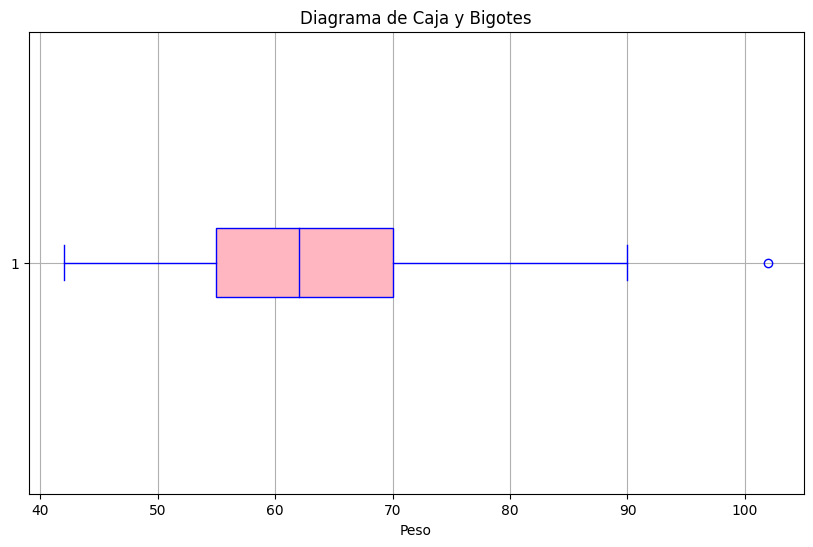

In [ ]:
# @title **Paso 20:  Visualización - Diagrama de Caja y Bigotes**
import matplotlib.pyplot as plt


# Crear el diagrama de caja y bigotes horizontal
plt.figure(figsize=(10, 6))
plt.boxplot(datos_peso, patch_artist=True, vert=False, boxprops=dict(facecolor='lightpink', color='blue'),
            whiskerprops=dict(color='blue'), capprops=dict(color='blue'),
            medianprops=dict(color='blue'), flierprops=dict(markeredgecolor='blue'))

# Configuración del gráfico
plt.title('Diagrama de Caja y Bigotes')
plt.xlabel('Peso')
plt.grid(True)

# Mostrar gráfico
plt.show()

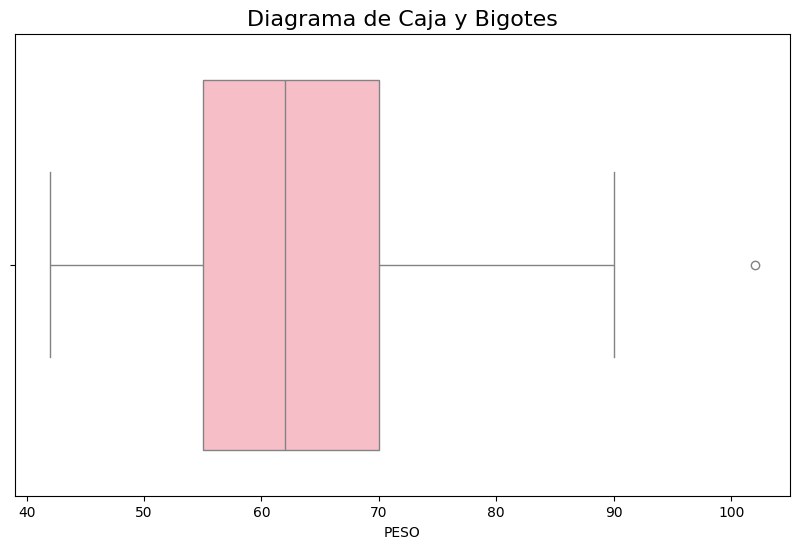

In [ ]:
# @title **21. Usando seaborn - Diagrama de Caja y Bigotes**
import matplotlib.pyplot as plt
import seaborn as sns


# Crear la figura y los ejes
fig, ax = plt.subplots(figsize=(10, 6))
sns.boxplot(x=datos_peso, ax=ax, color="lightpink")
ax.grid(False)

# Título
ax.set_title('Diagrama de Caja y Bigotes', fontsize=16)

# Mostrar el gráfico
plt.show()

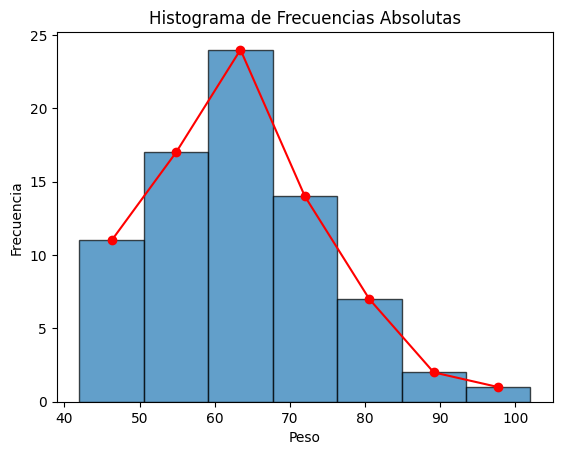

In [ ]:
# @title **Paso 22: Histograma de frecuencias absolutas y polígono de frecuencias**
# Histograma de frecuencias absolutas
plt.hist(datos_peso, bins=7, edgecolor='black', alpha=0.7)
plt.title('Histograma de Frecuencias Absolutas')
plt.xlabel('Peso')
plt.ylabel('Frecuencia')

# Dibujar el polígono de frecuencias
frequencies, bins, _ = plt.hist(datos_peso, bins=7, edgecolor='black', alpha=0.0)  # Solo obtener datos del histograma
plt.plot((bins[:-1] + bins[1:]) / 2, frequencies, color='red', marker='o')  # Polígono

# Mostrar gráfico
plt.show()

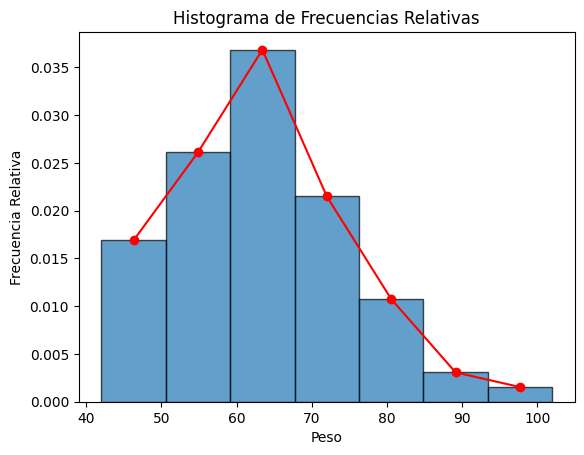

In [ ]:
# @title **Paso 23: Histograma de frecuencias relativas y polígono**
import matplotlib.pyplot as plt

# Calcular las frecuencias relativas
frecuencias_relativas, bins, _ = plt.hist(datos_peso, bins=7, density=True, edgecolor='black', alpha=0.7)
plt.title('Histograma de Frecuencias Relativas')
plt.xlabel('Peso')
plt.ylabel('Frecuencia Relativa')

# Dibujar el polígono de frecuencias relativas
centros_clases = (bins[:-1] + bins[1:]) / 2
plt.plot(centros_clases, frecuencias_relativas, color='red', marker='o')  # Polígono

# Mostrar gráfico
plt.show()

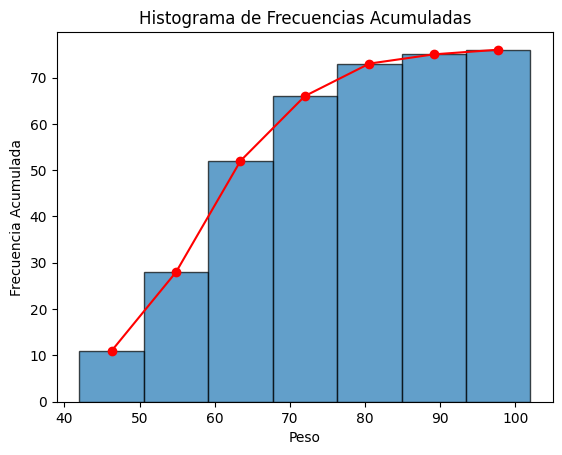

In [ ]:
# @title **Paso 24: Histograma de frecuencias acumuladas y polígono**
# Histograma de frecuencias acumuladas
plt.hist(datos_peso, bins=7, cumulative=True, edgecolor='black', alpha=0.7)
plt.title('Histograma de Frecuencias Acumuladas')
plt.xlabel('Peso')
plt.ylabel('Frecuencia Acumulada')

# Dibujar el polígono de frecuencias acumuladas
frequencies, bins, _ = plt.hist(datos_peso, bins=7, cumulative=True, edgecolor='black', alpha=0.0)  # Solo obtener datos
plt.plot((bins[:-1] + bins[1:]) / 2, frequencies, color='red', marker='o')  # Polígono

# Mostrar gráfico
plt.show()

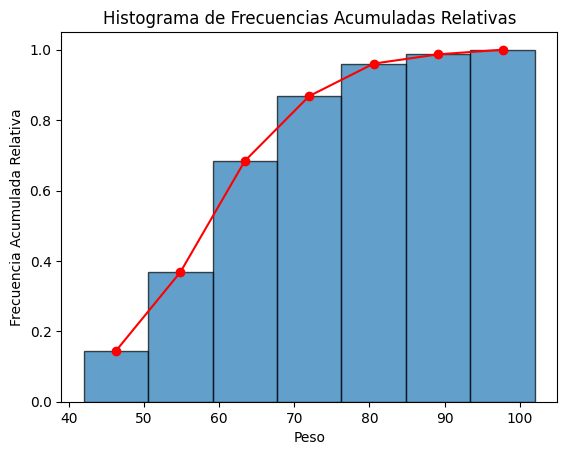

In [ ]:
# @title **25. Histograma de Frecuencias Acumuladas Relativas**
import matplotlib.pyplot as plt
import numpy as np

# Datos de ejemplo (ajusta los datos según tu contexto)
#datos_peso = np.random.normal(70, 10, 300)  # Datos simulados, ajusta a tus necesidades

# Paso 4: Histograma de frecuencias acumuladas relativas y polígono
n = len(datos_peso)  # Tamaño total de la muestra

# Histograma de frecuencias acumuladas
plt.hist(datos_peso, bins=7, cumulative=True, edgecolor='black', alpha=0.7, weights=np.ones_like(datos_peso)/n)
plt.title('Histograma de Frecuencias Acumuladas Relativas')
plt.xlabel('Peso')
plt.ylabel('Frecuencia Acumulada Relativa')

# Dibujar el polígono de frecuencias acumuladas relativas
frequencies, bins, _ = plt.hist(datos_peso, bins=7, cumulative=True, edgecolor='black', alpha=0.0, weights=np.ones_like(datos_peso)/n)  # Solo obtener datos
plt.plot((bins[:-1] + bins[1:]) / 2, frequencies, color='red', marker='o')  # Polígono

# Mostrar gráfico
plt.show()


In [ ]:
# @title **Paso 26.  Mostrar la tabla final con separación vertical**
print(tabla_frecuencia[['Intervalos de clase', 'Frecuencia absoluta (fᵢ)', 'Marca de clase (Xᵢ)',
                        'Frecuencia absoluta acumulada (Fᵢ)', 'Frecuencia relativa (fᵢ)',
                        'Frecuencia relativa acumulada (Fᵢ)']].to_string(index=False))

Intervalos de clase  Frecuencia absoluta (fᵢ)  Marca de clase (Xᵢ)  Frecuencia absoluta acumulada (Fᵢ)  Frecuencia relativa (fᵢ)  Frecuencia relativa acumulada (Fᵢ)
       [41.9, 50.6)                        11                 46.3                                  11                 14.473684                           14.473684
       [50.6, 59.1)                        17                 54.9                                  28                 22.368421                           36.842105
       [59.1, 67.7)                        24                 63.4                                  52                 31.578947                           68.421053
       [67.7, 76.3)                        14                 72.0                                  66                 18.421053                           86.842105
       [76.3, 84.9)                         7                 80.6                                  73                  9.210526                           96.052632
       [84

## **La fórmula para la _media agrupada_ es:**

$$
\bar{X} = \frac{\sum_{i=1}^{k} f_i \cdot X_i}{\sum_{i=1}^{k} f_i}
$$

Donde:
- $\bar{X}$ es la media agrupada.
- $f_i$ es la frecuencia absoluta de la \(i\)-ésima clase.
- $X_i$ es la marca de clase de la \(i\)-ésima clase.
- $k$ es el número total de clases.

+ Esta fórmula calcula la media ponderada de las marcas de clase $X_i$, ponderadas por sus respectivas frecuencias $f_i$.

In [ ]:
# @title **27. Calculando la  Media Agrupada $$\bar{X} = \frac{\sum_{i=1}^{k} f_i \cdot X_i}{\sum_{i=1}^{k} f_i}$$**

media_agrupada = np.average(tabla_frecuencia['Marca de clase (Xᵢ)'], weights=tabla_frecuencia['Frecuencia absoluta (fᵢ)'])
print(f"Media Agrupada: {media_agrupada:.2f}")
print(f"Media individual: {np.mean(datos_peso):.2f}")

Media Agrupada: 63.32
Media individual: 63.53


## **Formula  Mediana agrupada (aproximada)**
+ La fórmula para la **mediana agrupada** es la siguiente:

$$
Me = L_i + \left( \frac{\frac{N}{2} - F_i}{f_i} \right) \cdot c
$$

+ Donde:
  - $M$ es la mediana.
  - $L_i$ es el límite inferior de la clase mediana.
 - $N$ es el tamaño total de la muestra.
  - $F_i$ es la frecuencia acumulada de la clase anterior a la clase mediana.
  - $f_i$ es la frecuencia de la clase mediana.
 -  $c$ es el tamaño del intervalo de clase.

Esta fórmula se usa para estimar la mediana de un conjunto de datos agrupados en clases de frecuencias.

In [ ]:
# @title **28. Calculando la Mediana agrupada (aproximada) $$Me = L_i + \left( \frac{\frac{N}{2} - F_i}{f_i} \right) \cdot c$$**
n = len(datos_peso)
tabla_frecuencia['Intervalos de clase'] = tabla_frecuencia.index
F_ant = tabla_frecuencia['Frecuencia absoluta (fᵢ)'].cumsum().shift(1).fillna(0)
Li = tabla_frecuencia['Intervalos de clase'].apply(lambda x: x.left)
marca_clase = tabla_frecuencia['Marca de clase (Xᵢ)']
f_i = tabla_frecuencia['Frecuencia absoluta (fᵢ)']

# Fórmula de mediana agrupada
L_mediana = Li[(F_ant + f_i).ge(n / 2).idxmax()]
F_ant_mediana = F_ant[(F_ant + f_i).ge(n / 2).idxmax()]
f_mediana = f_i[(F_ant + f_i).ge(n / 2).idxmax()]


# Calcular amplitud de clase correctamente
amplitud_clase = tabla_frecuencia['Intervalos de clase'].apply(lambda x: x.right - x.left).values[0]  # Amplitud del primer intervalo

mediana_agrupada = L_mediana + (n / 2 - F_ant_mediana) / f_mediana * amplitud_clase


print(f"L_i = {L_mediana} es el límite inferior de la clase mediana.")
print(f"N = {n} es el tamaño total de la muestra.")
print(f"F_i = {F_ant_mediana} es la frecuencia acumulada de la clase anterior a la clase mediana.")
print(f"f_i ={f_mediana} es la frecuencia de la clase mediana.")
print(f"c ={amplitud_clase} es el tamaño del intervalo de clase.")
print(f"Mediana agrupada: M = {L_mediana} + ({n / 2} - {F_ant_mediana}) / {f_mediana} * {amplitud_clase }= {mediana_agrupada}")
print(f"Mediana individual: {np.median(datos_peso):.2f}")

L_i = 59.143 es el límite inferior de la clase mediana.
N = 76 es el tamaño total de la muestra.
F_i = 28.0 es la frecuencia acumulada de la clase anterior a la clase mediana.
f_i =24 es la frecuencia de la clase mediana.
c =8.631 es el tamaño del intervalo de clase.
Mediana agrupada: M = 59.143 + (38.0 - 28.0) / 24 * 8.631= 62.73925
Mediana individual: 62.00


## **Formula  Moda agrupada (aproximada)**
+ La fórmula para la **Moda agrupada** es la siguiente:

$$
Mo = L_i + \frac{ f_m - f_{m-1}}{( f_m - f_{m-1})+( f_m - f_{m+1})}*c
$$

+ Donde:
  - $Mo$ es la moda agupada.
  - $L_m$ es el límite inferior de la clase modal.
 - $N$ es el tamaño total de la muestra.
  - $f_m$ es la frecuencia de la clase modal.
  - $f_{m-1}$ es la frecuencia de la clase anterior a la clase de modal.
  - $f_{m+1}$ es la frecuencia de la clase posterior a la clase de modal.
 -  $c$ es el tamaño del intervalo de clase.



In [ ]:
print(tabla_frecuencia[['Intervalos de clase', 'Frecuencia absoluta (fᵢ)', 'Marca de clase (Xᵢ)',
                        'Frecuencia absoluta acumulada (Fᵢ)', 'Frecuencia relativa (fᵢ)',
                        'Frecuencia relativa acumulada (Fᵢ)']].to_string(index=False))

Intervalos de clase  Frecuencia absoluta (fᵢ)  Marca de clase (Xᵢ)  Frecuencia absoluta acumulada (Fᵢ)  Frecuencia relativa (fᵢ)  Frecuencia relativa acumulada (Fᵢ)
    (41.94, 50.571]                        11                 46.3                                  11                 14.473684                           14.473684
   (50.571, 59.143]                        17                 54.9                                  28                 22.368421                           36.842105
   (59.143, 67.714]                        24                 63.4                                  52                 31.578947                           68.421053
   (67.714, 76.286]                        14                 72.0                                  66                 18.421053                           86.842105
   (76.286, 84.857]                         7                 80.6                                  73                  9.210526                           96.052632
   (84.857

In [ ]:
# @title **29. Calculando la moda agrupada $$Mo = L_i + \frac{ f_m - f_{m-1}}{( f_m - f_{m-1})+( f_m - f_{m+1})}*c$$**
indice_clase_modal = f_i.idxmax()  # Índice de la clase con mayor frecuencia
f_m = f_i[indice_clase_modal]  # Frecuencia de la clase modal

# Get the index position of the modal class
modal_index_position = f_i.index.get_loc(indice_clase_modal)

# Access previous and next frequencies using the index position
f_m_1 = f_i.iloc[modal_index_position - 1] if modal_index_position > 0 else 0  # Frecuencia de la clase anterior
f_m_2 = f_i.iloc[modal_index_position + 1] if modal_index_position < len(f_i) - 1 else 0  # Frecuencia de la clase siguiente

L_modal = Li[indice_clase_modal]  # Límite inferior de la clase modal

# Paso 2: Cálculo de la moda agrupada
moda_agrupada = L_modal + ((f_m - f_m_1) / ((f_m - f_m_1) + (f_m - f_m_2))) * amplitud_clase

# Mostrar el resultado
print(f"L_m = {L_modal} es el límite inferior de la clase modal.")
print(f"f_m = {f_m} es la frecuencia de la clase modal.")
print(f"f_m-1 = {f_m_1} es la frecuencia de la clase anterior a la modal.")
print(f"f_m+1 = {f_m_2} es la frecuencia de la clase siguiente a la modal.")
print(f"c = {amplitud_clase} es el tamaño del intervalo de clase.")
print(f"Moda agrupada: Mo = {L_modal} + ({(f_m - f_m_1)} / ({(f_m - f_m_1)} + {(f_m - f_m_2)})) * {amplitud_clase} = {moda_agrupada}")
print(f"Moda individual: {stats.mode(datos_peso, keepdims=True).mode[0]}")

L_m = 59.143 es el límite inferior de la clase modal.
f_m = 24 es la frecuencia de la clase modal.
f_m-1 = 17 es la frecuencia de la clase anterior a la modal.
f_m+1 = 14 es la frecuencia de la clase siguiente a la modal.
c = 8.631 es el tamaño del intervalo de clase.
Moda agrupada: Mo = 59.143 + (7 / (7 + 10)) * 8.631 = 62.69694117647059
Moda individual: 60


## **Formula para Otras medidas de posición**
+ La función `posicion_agrupada(q, n)` tiene como objetivo calcular la posición de un cuantil en un conjunto de datos agrupados. A continuación, te explico los términos y pasos de la función.

### **Parámetros:**
- **`q`**: es el cuantil que queremos calcular (por ejemplo, para la mediana \(q = 0.5\), para el cuartil inferior \(q = 0.25\), etc.).
- **`n`**: es el tamaño total de la muestra, es decir, el número total de observaciones en el conjunto de datos.

### **Variables dentro de la función:**
1. **`L`**:
   - **Definición**: es el límite inferior de la clase cuantil, es decir, el límite inferior del intervalo de clase que contiene el cuantil que queremos calcular.
   - **Cálculo**: `Li[(F_ant + f_i).ge(n * q).idxmax()]` selecciona el límite inferior del intervalo de clase donde el cuantil cae. El cálculo de la condición `F_ant + f_i` evalúa la frecuencia acumulada y localiza el primer intervalo donde el cuantil se encuentra.

2. **`F_ant_q`**:
   - **Definición**: es la frecuencia acumulada de todas las clases anteriores a la clase cuantil. Es decir, cuántos elementos se han acumulado antes de llegar a la clase que contiene el cuantil.
   - **Cálculo**: `F_ant[(F_ant + f_i).ge(n * q).idxmax()]` evalúa la misma condición que para `L` y devuelve la frecuencia acumulada justo antes de la clase cuantil.

3. **`f_q`**:
   - **Definición**: es la frecuencia de la clase cuantil, es decir, cuántos elementos hay dentro del intervalo de clase donde se encuentra el cuantil.
   - **Cálculo**: `f_i[(F_ant + f_i).ge(n * q).idxmax()]` devuelve la frecuencia de la clase en la que cae el cuantil.

4. **`amplitud_clase`**:
   - **Definición**: es el tamaño del intervalo de clase, es decir, la longitud del intervalo en la que se agrupan los datos. Se calcula como la diferencia entre los límites superior e inferior de cada clase.

### **Explicación del retorno:**
La función retorna la fórmula del cuantil agrupado:

$$
\text{Cuantil} = L + \left( \frac{n \cdot q - F\_ant\_q}{f\_q} \right) \cdot c
$$

- $L$: el límite inferior de la clase cuantil.
- $n \cdot q$: el índice del cuantil dentro del conjunto de datos.
- $F\_ant\_q$: frecuencia acumulada de las clases anteriores.
- $f\_q$: frecuencia de la clase cuantil.
- $c$: la amplitud de la clase.


In [ ]:
# @title **30. Calculando los cuartiles - $$\text{Cuantil} = L + \left( \frac{n \cdot q - F\_ant\_q}{f\_q} \right) \cdot c$$**
# Para cuartiles y deciles agrupados se usa una aproximación similar a la mediana agrupada
def posicion_agrupada(q, n):
    L = Li[(F_ant + f_i).ge(n * q).idxmax()]
    F_ant_q = F_ant[(F_ant + f_i).ge(n * q).idxmax()]
    f_q = f_i[(F_ant + f_i).ge(n * q).idxmax()]
    return L + (n * q - F_ant_q) / f_q * amplitud_clase


In [ ]:
# @title **a. Cuartiles Q1 y Q3**

n = len(datos_peso)

q1_agrupado = posicion_agrupada(0.25, n)
q3_agrupado = posicion_agrupada(0.75, n)

# Parametros


print(f"Q1 agrupado: Q1 =  {q1_agrupado}")
print(f"Q3 agrupado: Q3 = {q3_agrupado}")
print(f"Q1 individual: {np.percentile(datos_peso, 25)}")
print(f"Q3 individual: {np.percentile(datos_peso, 75)}")



Q1 agrupado: Q1 =  54.63264705882353
Q3 agrupado: Q3 = 70.7965
Q1 individual: 55.0
Q3 individual: 70.0


In [ ]:
# @title **b. Calculando los Deciles (D1, D8)**
# Para cuartiles y deciles agrupados se usa una aproximación similar a la mediana agrupada
def posicion_agrupada(q, n):
    L = Li[(F_ant + f_i).ge(n * q).idxmax()]
    F_ant_q = F_ant[(F_ant + f_i).ge(n * q).idxmax()]
    f_q = f_i[(F_ant + f_i).ge(n * q).idxmax()]
    return L + (n * q - F_ant_q) / f_q * amplitud_clase

d1_agrupado = posicion_agrupada(0.10, n)

d8_agrupado = posicion_agrupada(0.8, n)
# Resultados

print(f"D1 agrupado: {d1_agrupado}")

print(f"D8 agrupado: {d8_agrupado}")
print(f"D1 individual: {np.percentile(datos_peso, 10)}")
print(f"D8 individual: {np.percentile(datos_peso, 80)}")


D1 agrupado: 47.90323636363636
D8 agrupado: 73.1392
D1 individual: 50.0
D8 individual: 72.0


In [ ]:
# @title **c. Calculando los Percentiles (P21, P36)**
# Para cuartiles y deciles agrupados se usa una aproximación similar a la mediana agrupada
def posicion_agrupada(q, n):
    L = Li[(F_ant + f_i).ge(n * q).idxmax()]
    F_ant_q = F_ant[(F_ant + f_i).ge(n * q).idxmax()]
    f_q = f_i[(F_ant + f_i).ge(n * q).idxmax()]
    return L + (n * q - F_ant_q) / f_q * amplitud_clase

P21_agrupado = posicion_agrupada(0.21, n)

P36_agrupado = posicion_agrupada(0.36, n)


# Resultados

print(f"P21 agrupado: {P21_agrupado}")

print(f"P36 agrupado: {P36_agrupado}")

print(f"P21 individual: {np.percentile(datos_peso, 21)}")
print(f"P36 individual: {np.percentile(datos_peso, 36)}")

P21 agrupado: 53.08922117647059
P36 agrupado: 58.87706823529412
P21 individual: 55.0
P36 individual: 59.0


In [ ]:
# @title **Paso 6: Intervalo de confianza del 95% para la media usando la distribución _t_-Student**
import scipy.stats as stats

# Media y desviación estándar de los datos individuales
media = np.mean(datos_peso)
desviacion_estandar = np.std(datos_peso, ddof=1)

# Intervalo de confianza del 95%
n = len(datos_peso)
nivel_confianza = 0.95
error_estandar = desviacion_estandar / np.sqrt(n)
intervalo_confianza = stats.t.interval(nivel_confianza, df=n-1, loc=media, scale=error_estandar)

# Resultados
# Rounding each element of the tuple separately
print(f"Intervalo de confianza del 95% para la media:")


print(f"({round(intervalo_confianza[0], 2)}, {round(intervalo_confianza[1], 2)})")

Intervalo de confianza del 95% para la media:
(60.96, 66.1)


In [ ]:
# @title **Paso 31: Inferencia - Intervalo de confianza del 95% para la media (usando la distribución normal estándar) $$IC(\mu)=\bar{y}_{peso}+/-z_{\alpha/2}\cdot\frac{s}{\sqrt{n}}$$**


# Suponiendo que la desviación estándar poblacional es conocida o que n es grande (n>=30)
# Si no se conoce la desviación estándar poblacional se usa la distribución t-student.
# Si n>=30, las distribuciones t-student y normal estandar son muy parecidas

# Media y desviación estándar de los datos individuales
media = np.mean(datos_peso)
desviacion_estandar = np.std(datos_peso, ddof=1)  # Desviación estándar muestral


# Nivel de confianza
nivel_confianza = 0.95

# Calcula el valor z para el nivel de confianza deseado (ej. 95% de confianza)
z = stats.norm.ppf(1 - (1 - nivel_confianza) / 2) # El valor z asociado a la cola superior 0.025 es 1.96 para un intervalo de confianza del 95%

# Error estándar
n = len(datos_peso)
error_estandar = desviacion_estandar / np.sqrt(n)

# Calcula el margen de error
margen_error = z * error_estandar

# Calcula el intervalo de confianza
limite_inferior = media - margen_error
limite_superior = media + margen_error

# Resultados
print(f"Intervalo de confianza del 95% para la media (usando la distribución normal estándar):")
print(f"({round(limite_inferior, 2)}, {round(limite_superior, 2)})")

Intervalo de confianza del 95% para la media (usando la distribución normal estándar):
(61.0, 66.05)


In [ ]:
# @title **Paso 32: Intervalo de confianza del 95% para la media usando la distribución t: $$IC(\mu)=\bar{y}_{peso}+/-t_{\alpha/2,n-1}\cdot\frac{s}{\sqrt{n}}$$**
import scipy.stats as stats

# Media y desviación estándar de los datos individuales
media = np.mean(datos_peso)
desviacion_estandar = np.std(datos_peso, ddof=1)

# Intervalo de confianza del 95%
n = len(datos_peso)
nivel_confianza = 0.95
error_estandar = desviacion_estandar / np.sqrt(n)
intervalo_confianza = stats.t.interval(nivel_confianza, df=n-1, loc=media, scale=error_estandar)

# Resultados
print(f"Intervalo de confianza del 95% para la media: {intervalo_confianza}")

Intervalo de confianza del 95% para la media: (60.95683220595449, 66.09579937299289)


# **1. Un algo pequeño acerca de la Estadística Descriptiva con Python usando Colab**

+ *La Estadística Descriptiva se centra en describir y resumir conjuntos de datos. Se utiliza para presentar las características básicas de los datos de manera sencilla y comprensible. Esto incluye medidas como la media, mediana, moda, rango, varianza, desviación estándar, y más.*

# **Exploración de Datos**

+ *La exploración de datos es el proceso de analizar conjuntos de datos para resumir sus características principales, a menudo con métodos visuales. Una exploración de datos cuidadosa puede revelar patrones, anomalías, tendencias y relaciones entre los datos.*

# **Herramientas en Python para Estadística Descriptiva y Exploración de Datos**

+ **Python**, *siendo uno de los lenguajes de programación más populares para el análisis de datos, ofrece varias librerías para la estadística descriptiva y exploración de datos:*

+ **1. Pandas:** *Una biblioteca que proporciona estructuras de datos fáciles de usar y herramientas de análisis de datos. Ideal para manipulación y limpieza de datos.*

+ **2. NumPy:** *Útil para operaciones matemáticas y lógicas en arrays.*

+ **3. Matplotlib:** *Una biblioteca para la creación de gráficos estáticos, animados e interactivos en Python.*

+ **4. Seaborn:** *Basada en Matplotlib, Seaborn facilita la creación de gráficos estadísticos informativos.*


# **2. Para Empezar debemos tener unos datos**
## ***Para ello usaremos unos datos que inicialmente hemos cargado internamente para que conozcas la estuctura de los mismos***

## **Cargamos nuestros Datos: Usar Pandas para cargar los datos desde un archivo CSV o insertados manualmente.**

In [ ]:
import pandas as pd
import numpy as np
## **a. Importando las librerias a necesitar**
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns
import scipy.stats as stats
from pandas.plotting import register_matplotlib_converters



## **b. Exportamos nuestra última bbase de datos**
df_datos2 = pd.read_csv("/content/df_datos_LIMPIOS2.csv", delimiter=',')
df_datos2

,CURSO,ASISTENCIA,PROGRAMA,EDAD,URBANO,PESO,ESTATURA,TRANSPORTE,SEXO,ESTRATO,GR_SANGUINEO,DEFINITIVA
0,ESTADISTICA I,50,PSICOLOGÍA,19,SI,45,163,Mototaxi,Femenino,II,O positivo,4.5
1,PROBABILIDAD,50,FINANZAS,18,SI,56,160,Particular,Femenino,V,B positivo,4.5
2,PROBABILIDAD,35,FINANZAS,18,SI,67,173,Transcaribe,Femenino,IV,B positivo,1.5
3,PROBABILIDAD,60,FINANZAS,21,SI,69,180,Taxi,Masculino,V,O positivo,2.9
4,PROBABILIDAD,50,FINANZAS,18,SI,50,158,Taxi,Femenino,III,A positivo,2.6
...,...,...,...,...,...,...,...,...,...,...,...,...
71,PROBABILIDAD,45,ELECTRICA,21,NO,50,155,bus,Femenino,II,A positivo,3.5
72,ESTADISTICA I,40,PSICOLOGÍA,17,SI,50,165,Transcaribe,Masculino,III,O positivo,4.1
73,PROBABILIDAD,40,BIOMEDICA,19,SI,54,164,Transcaribe,Femenino,II,O positivo,2.6
74,ESTADISTICA I,25,DERECHO,18,SI,55,160,Taxi,Femenino,IV,O positivo,3.6


## **3. Visualización General: Obtener una vista rápida de los datos.**

### **a. Mostrar el DataFrame**

In [ ]:

### **a. Mostrar el DataFrame**
df_datos2 # Muestra losdatos


,CURSO,ASISTENCIA,PROGRAMA,EDAD,URBANO,PESO,ESTATURA,TRANSPORTE,SEXO,ESTRATO,GR_SANGUINEO,DEFINITIVA
0,ESTADISTICA I,50,PSICOLOGÍA,19,SI,45,163,Mototaxi,Femenino,II,O positivo,4.5
1,PROBABILIDAD,50,FINANZAS,18,SI,56,160,Particular,Femenino,V,B positivo,4.5
2,PROBABILIDAD,35,FINANZAS,18,SI,67,173,Transcaribe,Femenino,IV,B positivo,1.5
3,PROBABILIDAD,60,FINANZAS,21,SI,69,180,Taxi,Masculino,V,O positivo,2.9
4,PROBABILIDAD,50,FINANZAS,18,SI,50,158,Taxi,Femenino,III,A positivo,2.6
...,...,...,...,...,...,...,...,...,...,...,...,...
71,PROBABILIDAD,45,ELECTRICA,21,NO,50,155,bus,Femenino,II,A positivo,3.5
72,ESTADISTICA I,40,PSICOLOGÍA,17,SI,50,165,Transcaribe,Masculino,III,O positivo,4.1
73,PROBABILIDAD,40,BIOMEDICA,19,SI,54,164,Transcaribe,Femenino,II,O positivo,2.6
74,ESTADISTICA I,25,DERECHO,18,SI,55,160,Taxi,Femenino,IV,O positivo,3.6


### **b. Mostramos las primeras cinco filas del archivo**

In [ ]:
### **b. Mostramos las primeras cinco filas del archivo**
df_datos2.head()

,CURSO,ASISTENCIA,PROGRAMA,EDAD,URBANO,PESO,ESTATURA,TRANSPORTE,SEXO,ESTRATO,GR_SANGUINEO,DEFINITIVA
0,ESTADISTICA I,50,PSICOLOGÍA,19,SI,45,163,Mototaxi,Femenino,II,O positivo,4.5
1,PROBABILIDAD,50,FINANZAS,18,SI,56,160,Particular,Femenino,V,B positivo,4.5
2,PROBABILIDAD,35,FINANZAS,18,SI,67,173,Transcaribe,Femenino,IV,B positivo,1.5
3,PROBABILIDAD,60,FINANZAS,21,SI,69,180,Taxi,Masculino,V,O positivo,2.9
4,PROBABILIDAD,50,FINANZAS,18,SI,50,158,Taxi,Femenino,III,A positivo,2.6


### **c. Mostramos las ultimas cinco filas del DataFrame**

In [ ]:
## **c. Mostramos las ultimas cinco filas del DataFrame**
df_datos2.tail()

,CURSO,ASISTENCIA,PROGRAMA,EDAD,URBANO,PESO,ESTATURA,TRANSPORTE,SEXO,ESTRATO,GR_SANGUINEO,DEFINITIVA
71,PROBABILIDAD,45,ELECTRICA,21,NO,50,155,bus,Femenino,II,A positivo,3.5
72,ESTADISTICA I,40,PSICOLOGÍA,17,SI,50,165,Transcaribe,Masculino,III,O positivo,4.1
73,PROBABILIDAD,40,BIOMEDICA,19,SI,54,164,Transcaribe,Femenino,II,O positivo,2.6
74,ESTADISTICA I,25,DERECHO,18,SI,55,160,Taxi,Femenino,IV,O positivo,3.6
75,PROBABILIDAD,50,CONTADURIA,18,NO,60,170,bus,Femenino,II,O positivo,3.4


## **4. Visualización de Datos**

### **a. Gráficos de Lineas**

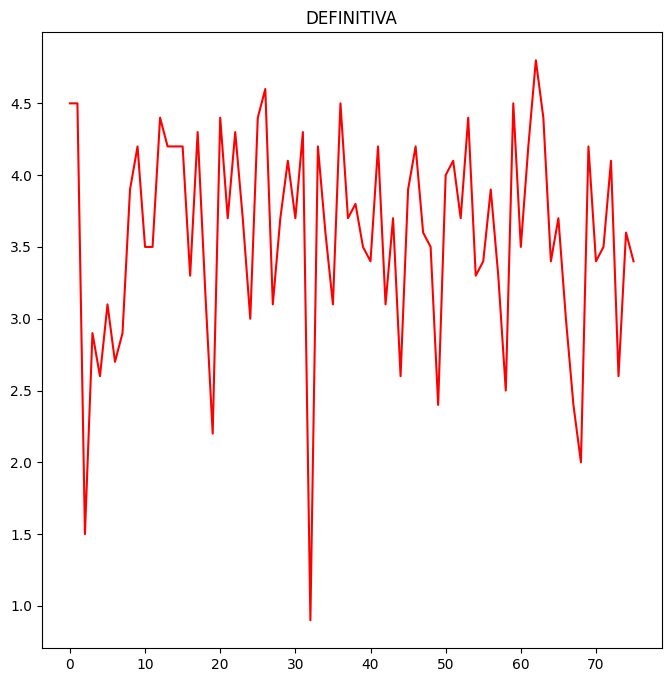

In [ ]:
### **a. Gráficos de Lineas**

fig, ax = plt.subplots(1, 1, figsize=(8, 8)) #Tamaño del gráfico
ax.set_title('DEFINITIVA') # Titulo principal
x = df_datos2['DEFINITIVA'] # variable a graficar
plt.plot(x, 'r-') # r es para el color y '-' para la linea
# Show plot
plt.show()



### **b. Gráficos de puntos**

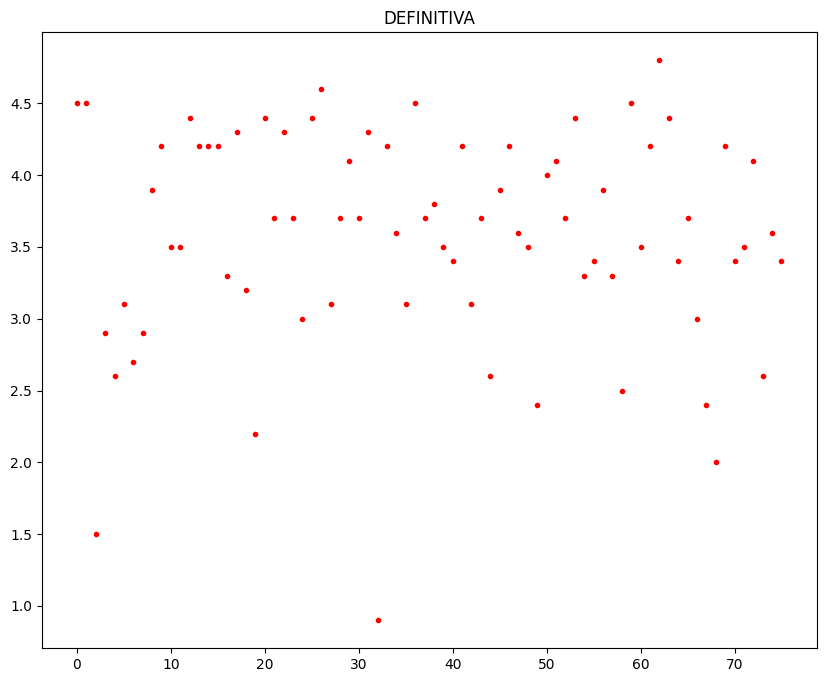

In [ ]:

### **b. Gráficos de puntos**
fig, ax = plt.subplots(1, 1, figsize=(10, 8)) #Tamaño del gráfico
ax.set_title('DEFINITIVA') # Titulo principal
x = df_datos2['DEFINITIVA'] # variable a graficar
plt.plot(x, 'r.') # r es para el color y '.' para los puntos
# Show plot
plt.show()

## **c. Diagrama de Caja y Bigotes**

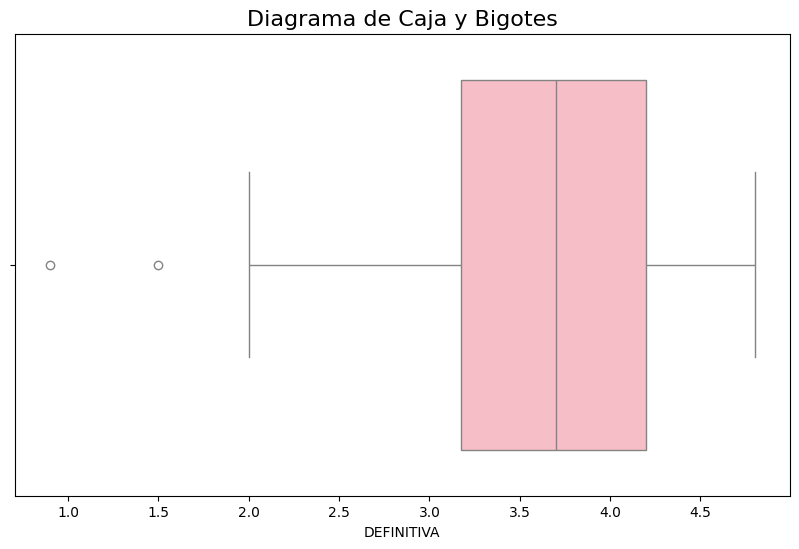

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Datos
datos = df_datos2['DEFINITIVA']

# Crear la figura y los ejes
fig, ax = plt.subplots(figsize=(10, 6))
sns.boxplot(x=datos, ax=ax, color="lightpink")
ax.grid(False)

# Título
ax.set_title('Diagrama de Caja y Bigotes', fontsize=16)

# Mostrar el gráfico
plt.show()

## **5. Visualización de Datos - Histogramas**

In [ ]:
# Definir los intervalos de clase y las frecuencias absolutas
data = {
    'Intervalo': ['[9, 14)', '[14, 19)', '[19, 24)', '[24, 29)', '[29, 34)', '[34, 39)', '[39, 44)', '[44, 49)'],
    'Frecuencia Absoluta': [5, 10, 11, 13, 12, 11, 10, 4]
}

# Crear un DataFrame
df = pd.DataFrame(data)

# Calcular las marcas de clase
df['Marca de Clase'] = [(9 + 14) / 2, (14 + 19) / 2, (19 + 24) / 2, (24 + 29) / 2,
                        (29 + 34) / 2, (34 + 39) / 2, (39 + 44) / 2, (44 + 49) / 2]

# Calcular la frecuencia absoluta acumulada
df['Frecuencia Absoluta Acumulada'] = df['Frecuencia Absoluta'].cumsum()

# Calcular la frecuencia relativa
total_frecuencia = df['Frecuencia Absoluta'].sum()
df['Frecuencia Relativa'] = df['Frecuencia Absoluta'] / total_frecuencia

# Calcular la frecuencia relativa acumulada
df['Frecuencia Relativa Acumulada'] = df['Frecuencia Relativa'].cumsum()

# Ajustar el DataFrame para que todas las columnas estén bien alineadas y en el mismo orden
df_adjusted = df[['Intervalo', 'Frecuencia Absoluta', 'Marca de Clase', 'Frecuencia Absoluta Acumulada',
                  'Frecuencia Relativa', 'Frecuencia Relativa Acumulada']]

# Mostrar la tabla ajustada
df_adjusted

,Intervalo,Frecuencia Absoluta,Marca de Clase,Frecuencia Absoluta Acumulada,Frecuencia Relativa,Frecuencia Relativa Acumulada
0,"[9, 14)",5,11.5,5,0.065789,0.065789
1,"[14, 19)",10,16.5,15,0.131579,0.197368
2,"[19, 24)",11,21.5,26,0.144737,0.342105
3,"[24, 29)",13,26.5,39,0.171053,0.513158
4,"[29, 34)",12,31.5,51,0.157895,0.671053
5,"[34, 39)",11,36.5,62,0.144737,0.815789
6,"[39, 44)",10,41.5,72,0.131579,0.947368
7,"[44, 49)",4,46.5,76,0.052632,1.000000


### **a. Histogramas para variable DEFINITIVA - Usando la regla de Sturges**

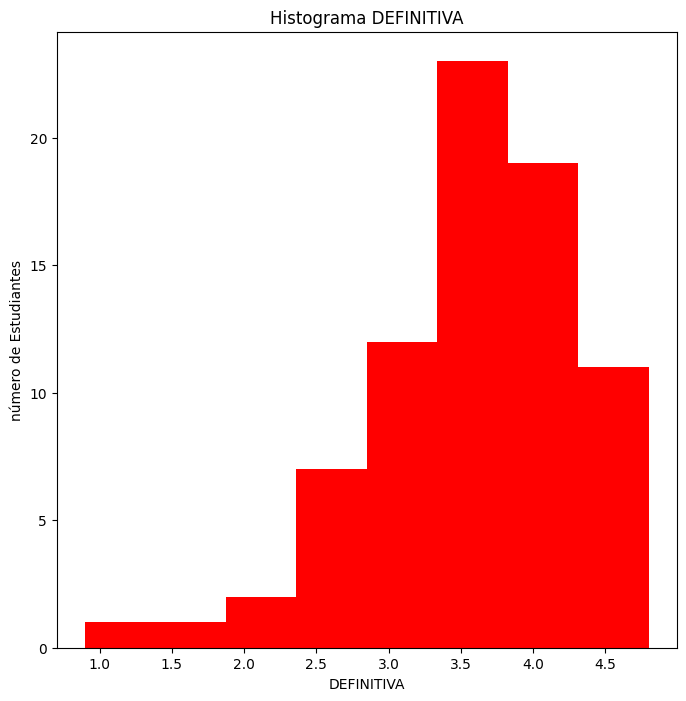

In [ ]:
### **a. Histogramas para variable DEFINITIVA**
plt.figure(figsize=(8, 8)) #Tamaño del gráfico
x = df_datos2['DEFINITIVA'] # variable a graficar
plt.hist(x, bins=8, facecolor='red', label='DEFINITIVA')
plt.title('Histograma DEFINITIVA')
plt.xlabel('DEFINITIVA')
plt.ylabel('número de Estudiantes')
plt.show()


### **b. Histogramas para variable DEFINITIVA - Haciendo visible los limites de los rectangulos**

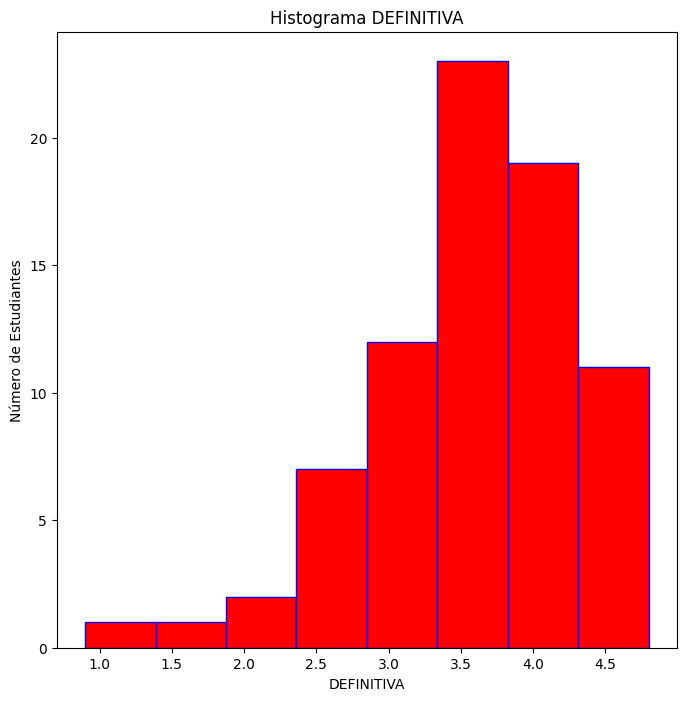

In [ ]:
### **b. Histogramas para variable DEFINITIVA - Haciendo visible los limites de los rectangulos**
plt.figure(figsize=(8, 8))  # Tamaño del gráfico
x = df_datos2['DEFINITIVA']  # Variable a graficar
plt.hist(x, bins=8, facecolor='red', label='DEFINITIVA', rwidth=1, edgecolor='blue')  # Añade edgecolor
plt.title('Histograma DEFINITIVA')
plt.xlabel('DEFINITIVA')
plt.ylabel('Número de Estudiantes')
plt.show()



### **c. Agregando una estimación de la densidad del kernel**

+ Agregar una **estimación de la densidad del kernel (KDE, por sus siglas en inglés)** al histograma significa superponer una curva suave que intenta aproximar la distribución subyacente de los datos de manera continua. A diferencia del histograma, que agrupa los datos en intervalos discretos (bins), la KDE estima la **densidad de probabilidad** en cada punto y genera una curva continua. Esta técnica puede proporcionar una visión más clara de la distribución general de los datos, especialmente cuando se busca entender la **tendencia global** sin depender del tamaño de los bins.

### **¿Qué es la Estimación de Densidad del Kernel (KDE)?**
- La KDE es una técnica no paramétrica que estima la **función de densidad de probabilidad** de una variable aleatoria.
- En lugar de agrupar los datos en intervalos como el histograma, asigna una **función kernel** (generalmente una gaussiana o normal) en cada punto de datos.
- El resultado es una curva continua y suave que refleja la distribución subyacente de los datos.

### **Ventajas de agregar una KDE al histograma:**
1. **Suaviza la variabilidad** que puede aparecer en los histogramas debido a la elección de los bins.
2. **Proporciona una estimación más fluida** de la distribución, lo que puede facilitar la interpretación visual de los datos.
3. **Evita la arbitrariedad** en la elección del número de bins, ya que la KDE es independiente de estos.
4. **Detecta patrones sutiles**, como multimodalidades (picos múltiples) que pueden no ser evidentes en un histograma con pocos bins.

### **¿Cuándo es útil?**
- Es útil cuando deseas visualizar una **aproximación suave** de la distribución subyacente de los datos sin depender de la discretización en bins.
- También es útil cuando tienes una muestra relativamente pequeña y un histograma puede ser sensible a la elección del tamaño de los bins.

### **Ejemplo visual:**
Cuando en Seaborn se utiliza `kde=True` en un histograma, se superpone esta curva suave:

```python
sns.histplot(data=df_datos2, x="DEFINITIVA", kde=True)
```

En este caso, la curva KDE se ajustará sobre el histograma, proporcionando una mejor idea de la **forma general** de la distribución de los datos.

<Axes: xlabel='DEFINITIVA', ylabel='Count'>

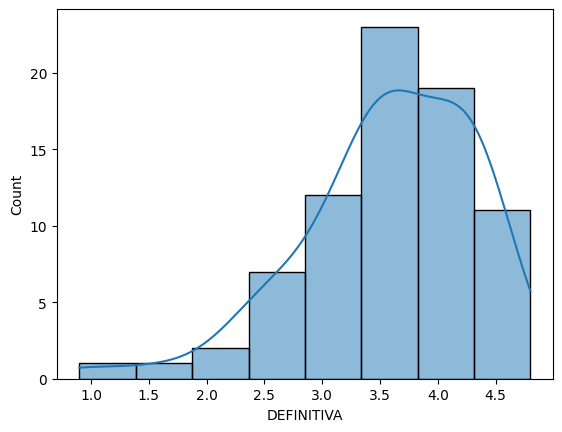

In [ ]:
### **b. Agregando una estimación de la densidad del kernel**
sns.histplot(data=df_datos2, x="DEFINITIVA", kde=True, bins = 8)

### **d. Mejorando la suavizacion de los datos**

El código `sns.kdeplot(data=df_datos2, x="DEFINITIVA", bw_adjust=5, cut=1)` utiliza la función `kdeplot` de Seaborn para generar una **Estimación de la Densidad del Kernel (KDE)** sobre la variable `DEFINITIVA`. Aquí te explico el significado de los parámetros:

### Parámetros:
1. **`data=df_datos2`**:
   - El conjunto de datos que contiene la columna `DEFINITIVA`.
   
2. **`x="DEFINITIVA"`**:
   - Especifica la variable en el eje X que se utilizará para generar la KDE. En este caso, se está utilizando la columna `DEFINITIVA` de tu DataFrame.

3. **`bw_adjust=5`**:
   - **`bw_adjust`** es un parámetro que ajusta el ancho de banda del kernel. El ancho de banda determina **cuánto se suaviza la curva** KDE.
   - Valores mayores que 1 (como en este caso `bw_adjust=5`) aumentan el ancho de banda, lo que genera una curva más suave y más extendida. En este ejemplo, se está haciendo la curva más suave de lo que sería con el ancho de banda predeterminado.
   - Valores menores que 1 harían que la curva sea más ajustada a los datos, mostrando más detalles pero potencialmente agregando ruido.

4. **`cut=1`**:
   - **`cut`** controla cuántas desviaciones estándar más allá del rango de los datos se extiende la curva KDE.
   - Si `cut=1`, la curva se extiende una desviación estándar más allá del rango de los datos.
   - Si el valor fuera `cut=0`, la curva KDE terminaría exactamente en los límites del conjunto de datos. Valores mayores (como 1 o más) hacen que la curva continúe más allá de los datos, lo que puede ser útil para visualizar mejor la distribución fuera de los puntos observados.

### En resumen:
- `bw_adjust=5` suaviza significativamente la curva KDE haciéndola más ancha y menos detallada.
- `cut=1` permite que la curva se extienda más allá del rango de los datos, pero solo una desviación estándar adicional.

### Visualmente:
Este gráfico te mostrará una curva de KDE muy suave (porque se ha ajustado mucho el ancho de banda) y extendida ligeramente más allá del rango de los datos originales, debido al valor `cut=1`.

Si deseas una curva más ajustada a los datos y que no se extienda tanto más allá de ellos, podrías disminuir el valor de `bw_adjust` o `cut`.

<Axes: xlabel='DEFINITIVA', ylabel='Density'>

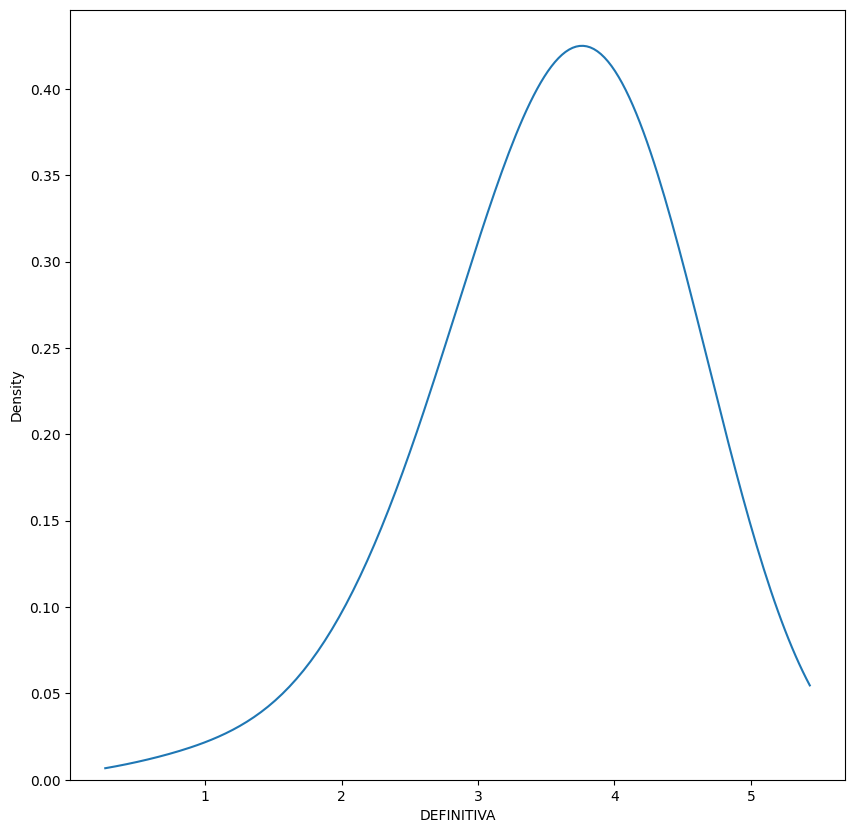

In [ ]:

plt.figure(figsize=(10, 10)) #Tamaño del gráfico

sns.kdeplot(data=df_datos2, x="DEFINITIVA", bw_adjust=2, cut=1)

### **e. Sobreponiendo la distribución Normal a los Datos**

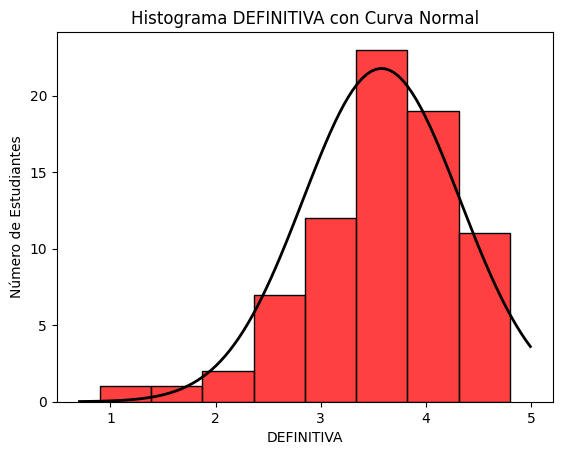

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm

# Datos del histograma
x = df_datos2['DEFINITIVA']

# Crear el histograma con Seaborn y la estimación de densidad (KDE)
sns.histplot(x, kde=False, bins=8, color='red')

# Calcular la media y desviación estándar de los datos
mean = np.mean(x)
std = np.std(x)

# Generar una curva normal teórica con la media y desviación estándar
xmin, xmax = plt.xlim()  # Límites del eje x
x_vals = np.linspace(xmin, xmax, 100)  # Generar valores de x
p = norm.pdf(x_vals, mean, std)  # Función de densidad de probabilidad

# Superponer la curva normal
plt.plot(x_vals, p * len(x) * (xmax - xmin) / 8, 'k', linewidth=2)  # Ajustar altura de la curva al histograma

# Añadir título y etiquetas
plt.title('Histograma DEFINITIVA con Curva Normal')
plt.xlabel('DEFINITIVA')
plt.ylabel('Número de Estudiantes')

plt.show()


<Axes: ylabel='Count'>

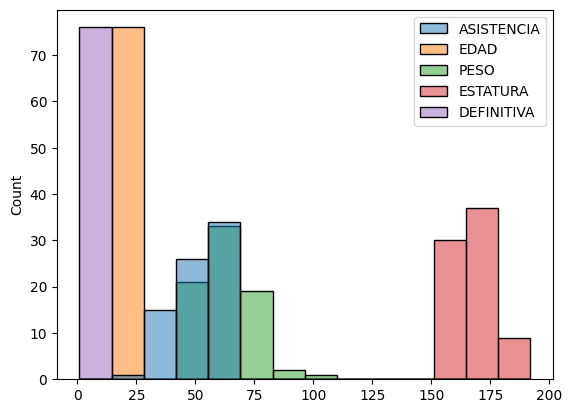

In [ ]:
## **a. Histograma multiple con todas las variables cuantitativas de la base de datos**
sns.histplot(data=df_datos2)

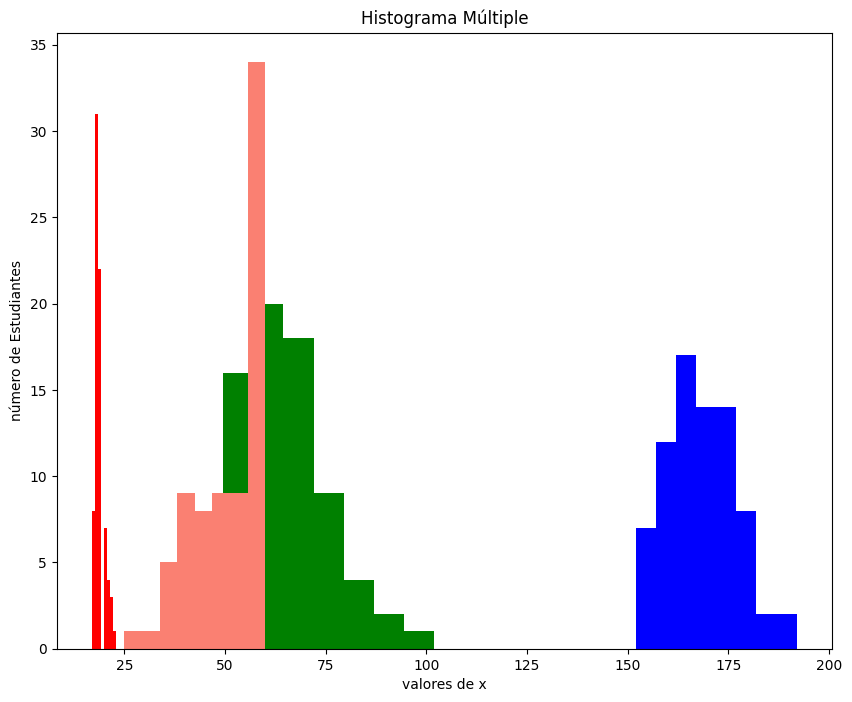

In [ ]:

## **a. crear histograma para EDAD, PESO, ESTATURA, SABER 11**
plt.figure(figsize=(10, 8))
n, bins, patches = plt.hist(df_datos2['EDAD'], 8,
                            facecolor='red', label='EDAD')
n, bins, patches = plt.hist(df_datos2['PESO'], 8,
                            facecolor='green', label='PESO')
n, bins, patches = plt.hist(df_datos2['ESTATURA'], 8,
                            facecolor='blue', label='ESTATURA')
n, bins, patches = plt.hist(df_datos2['ASISTENCIA'], 8,
                            facecolor='salmon', label='SABER 11')

plt.title('Histograma Múltiple')
plt.xlabel('valores de x')
plt.ylabel('número de Estudiantes')
plt.show()


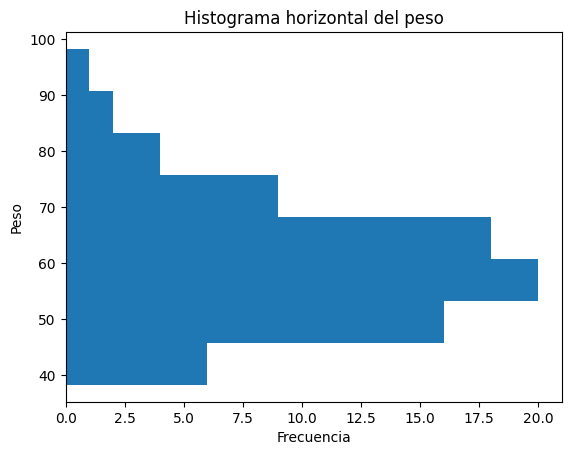

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
df = df_datos2.copy()
# Convert 'PESO' column to numeric type, handling potential errors
df['PESO'] = pd.to_numeric(df['PESO'], errors='coerce')

# Crear el histograma original para obtener los valores
counts, bins = np.histogram(df['PESO'], bins=8)

# Crear el gráfico de barras horizontal
plt.barh(bins[:-1], counts, height=(bins[1] - bins[0]))

# Mostrar el gráfico
plt.xlabel('Frecuencia')
plt.ylabel('Peso')
plt.title('Histograma horizontal del peso')
plt.show()

## **Paso 6. Vamos a construir un diagrama de barras individuales para las variables curso, transporte y sexo, para ello agrega una linea de código y copia lo siguiente:**

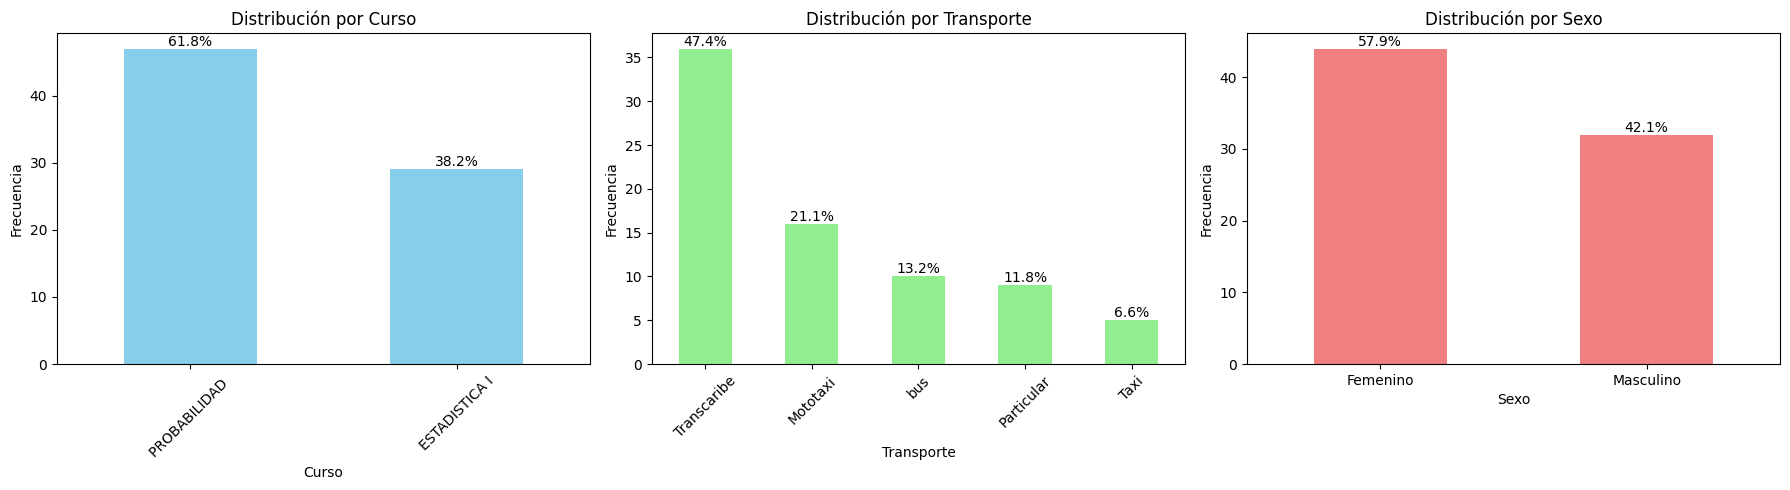

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Creación del DataFrame


# Configuración de la figura y los subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Función para agregar etiquetas de porcentaje a las barras
def add_percentage_labels(ax, total_count):
    for p in ax.patches:
        height = p.get_height()
        percentage = height / total_count * 100
        ax.annotate(f'{percentage:.1f}%',
                    (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='bottom', fontsize=10)

# Diagrama de barras para la variable 'CURSO'
curso_counts = df['CURSO'].value_counts()
curso_counts.plot(kind='bar', color='skyblue', ax=axes[0])
axes[0].set_title('Distribución por Curso')
axes[0].set_xlabel('Curso')
axes[0].set_ylabel('Frecuencia')
axes[0].tick_params(axis='x', rotation=45)
add_percentage_labels(axes[0], curso_counts.sum())

# Diagrama de barras para la variable 'TRANSPORTE'
transporte_counts = df['TRANSPORTE'].value_counts()
transporte_counts.plot(kind='bar', color='lightgreen', ax=axes[1])
axes[1].set_title('Distribución por Transporte')
axes[1].set_xlabel('Transporte')
axes[1].set_ylabel('Frecuencia')
axes[1].tick_params(axis='x', rotation=45)
add_percentage_labels(axes[1], transporte_counts.sum())

# Diagrama de barras para la variable 'SEXO'
sexo_counts = df['SEXO'].value_counts()
sexo_counts.plot(kind='bar', color='lightcoral', ax=axes[2])
axes[2].set_title('Distribución por Sexo')
axes[2].set_xlabel('Sexo')
axes[2].set_ylabel('Frecuencia')
axes[2].tick_params(axis='x', rotation=0)
add_percentage_labels(axes[2], sexo_counts.sum())

# Ajustar el layout
plt.tight_layout()
plt.show()


**Paso 7. Vamos a construir un diagrama de barras con todas las variables curso, transporte y sexo, para ello agrega una linea de código y copia lo siguiente:**

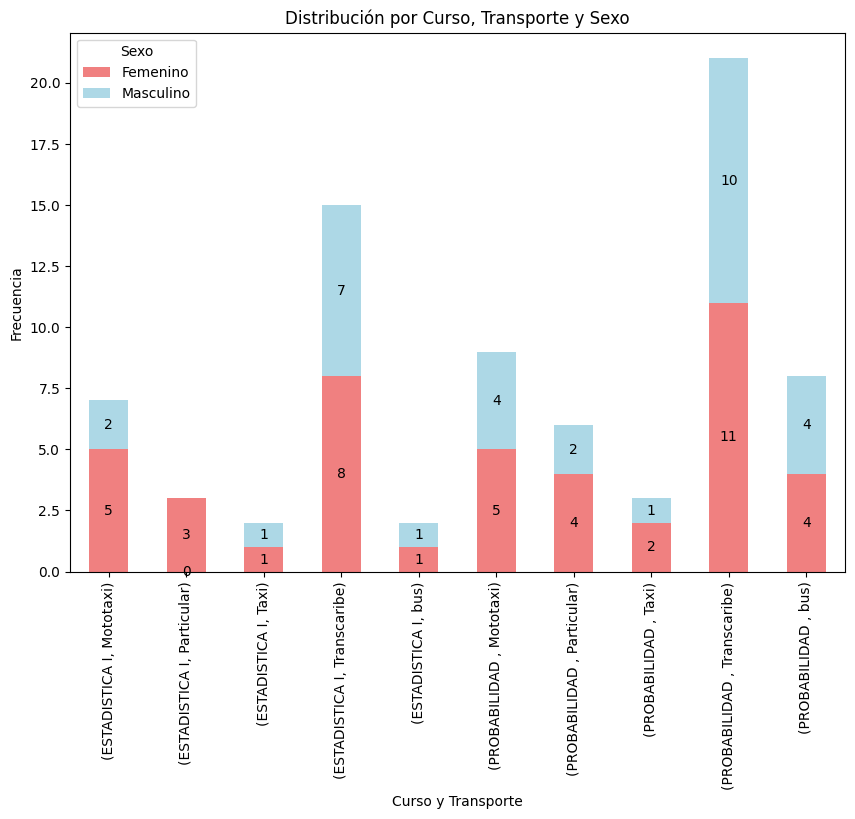

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Creación del DataFrame


# Creación de una tabla de contingencia para las tres variables
contingency_table = pd.crosstab([df['CURSO'], df['TRANSPORTE']], df['SEXO'])

# Configuración del gráfico
ax = contingency_table.plot(kind='bar', stacked=True, figsize=(10, 7), color=['lightcoral','lightblue' ])
plt.title('Distribución por Curso, Transporte y Sexo')
plt.xlabel('Curso y Transporte')
plt.ylabel('Frecuencia')
plt.xticks(rotation=90)
plt.legend(title='Sexo')

# Añadir etiquetas de datos en las barras
for p in ax.patches:
    width = p.get_width()  # Anchura de la barra
    height = p.get_height()  # Altura de la barra
    x = p.get_x() + width / 2  # Coordenada X del centro de la barra
    y = p.get_y() + height / 2  # Coordenada Y del centro de la barra
    ax.text(x, y, f'{int(height)}', ha='center', va='center')

plt.show()


**Paso 8. Ahora con porcentajes marginales, para ello agrega una linea de código y copia lo siguiente:**

<ipython-input-560-9a39cde455af>:18: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  total = totals[i]  # Total de la barra apilada en la posición i


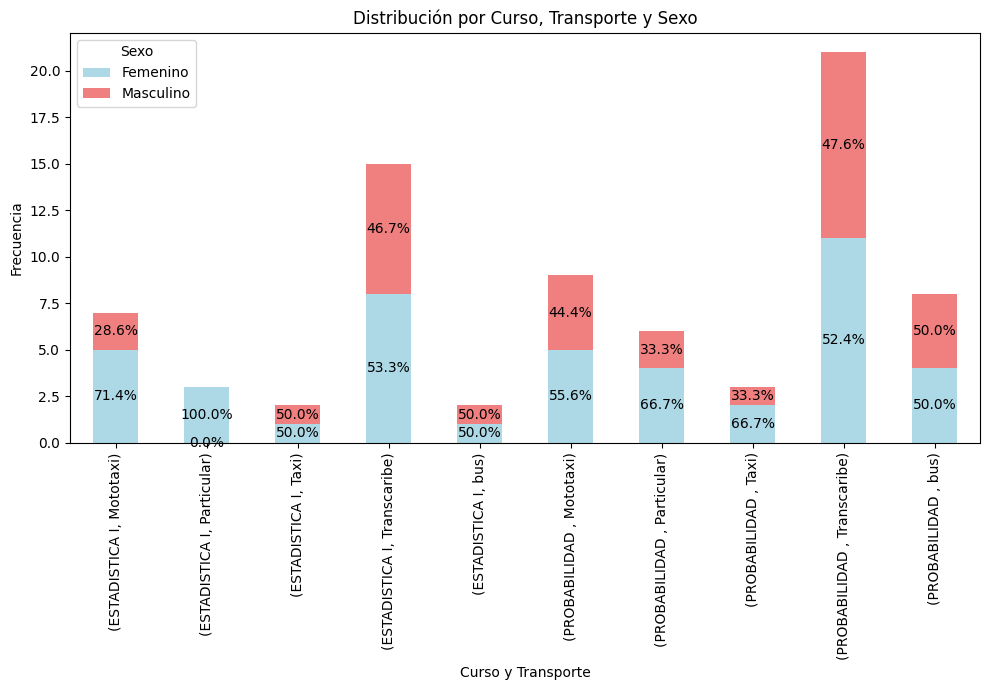

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Creación del DataFrame


# Creación de una tabla de contingencia para las tres variables
contingency_table = pd.crosstab([df['CURSO'], df['TRANSPORTE']], df['SEXO'])

# Función para agregar etiquetas de porcentaje a las barras
def add_percentage_labels(ax):
    # Sumar las alturas de las barras apiladas en cada posición de x
    totals = contingency_table.sum(axis=1)

    for container in ax.containers:
        for i, bar in enumerate(container):
            height = bar.get_height()
            total = totals[i]  # Total de la barra apilada en la posición i
            if total > 0:
                percentage = height / total * 100
                ax.annotate(f'{percentage:.1f}%',
                            (bar.get_x() + bar.get_width() / 2., bar.get_y() + height / 2),
                            ha='center', va='center', fontsize=10, color='black')

# Configuración del gráfico
ax = contingency_table.plot(kind='bar', stacked=True, figsize=(10, 7), color=['lightblue', 'lightcoral'])

# Agregar etiquetas de porcentaje a las barras
add_percentage_labels(ax)

# Ajustar el gráfico
plt.title('Distribución por Curso, Transporte y Sexo')
plt.xlabel('Curso y Transporte')
plt.ylabel('Frecuencia')
plt.xticks(rotation=90)
plt.legend(title='Sexo')
plt.tight_layout()
plt.show()


**Paso 9. Ahora los graficos de torta, para ello agrega una linea de código y copia lo siguiente:**

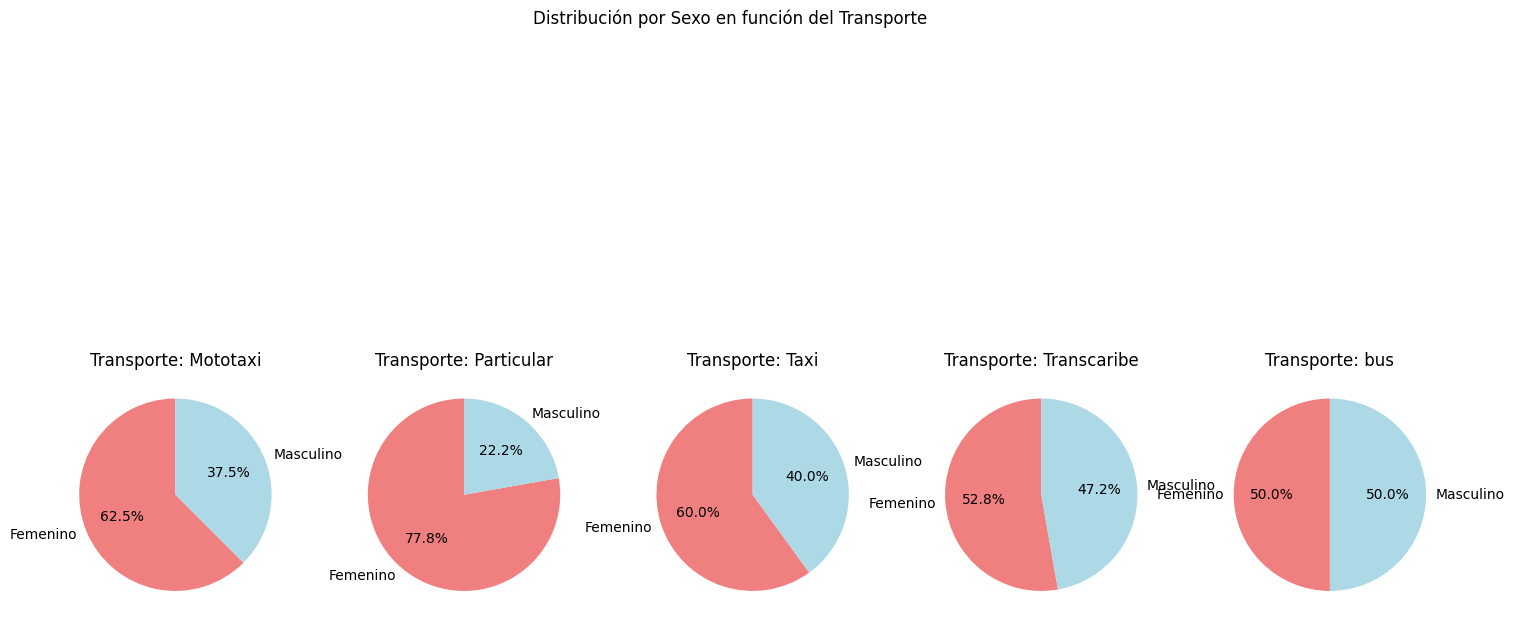

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Creación del DataFrame


# Creación de la tabla de contingencia para SEXO vs TRANSPORTE
contingency_table = pd.crosstab(df['TRANSPORTE'], df['SEXO'])

# Calcular los porcentajes para cada categoría
contingency_table_percentage = contingency_table.div(contingency_table.sum(axis=1), axis=0) * 100

# Crear subplots para mostrar cada transporte por separado
fig, axs = plt.subplots(1, len(contingency_table), figsize=(18, 10))

# Generar un gráfico circular por cada tipo de transporte
for i, transporte in enumerate(contingency_table.index):
    axs[i].pie(contingency_table_percentage.loc[transporte],
               labels=contingency_table.columns,
               autopct='%1.1f%%',
               startangle=90,
               colors=['lightcoral', 'lightblue'])
    axs[i].set_title(f'Transporte: {transporte}')

plt.suptitle('Distribución por Sexo en función del Transporte')
plt.show()


**Paso 10. Ahora los graficos de barra para curso Vs Sexo, para ello agrega una linea de código y copia lo siguiente:**

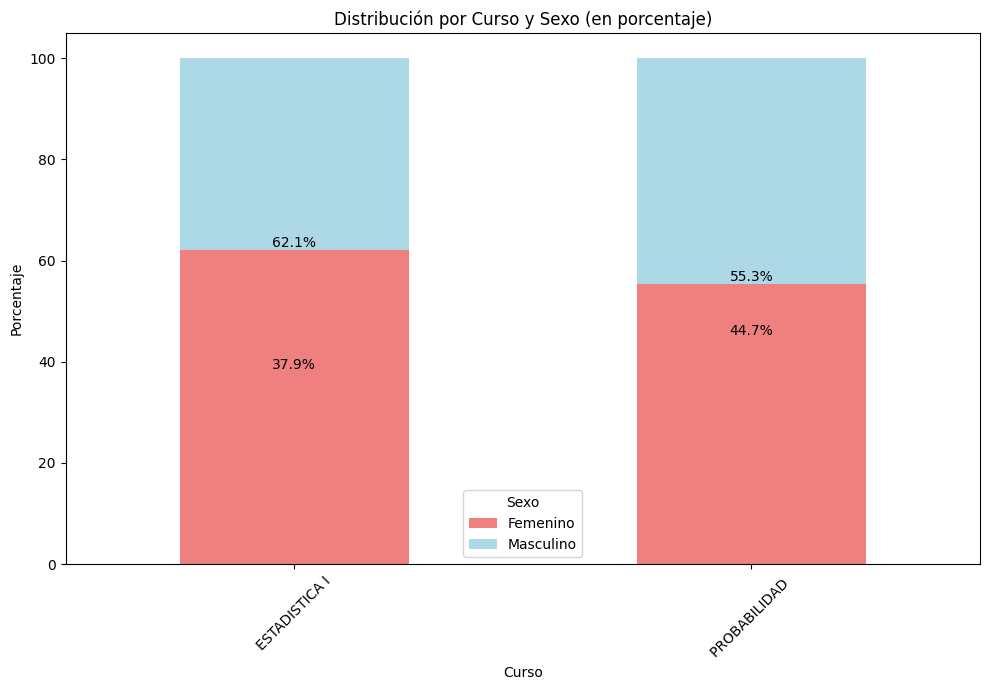

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Creación del DataFrame


# Crear una tabla de contingencia
contingency_table = pd.crosstab(df['CURSO'], df['SEXO'])

# Convertir las frecuencias a porcentajes
percentage_table = contingency_table.div(contingency_table.sum(axis=1), axis=0) * 100

# Configuración del gráfico
fig, ax = plt.subplots(figsize=(10, 7))

# Graficar las barras apiladas con porcentajes
percentage_table.plot(kind='bar', stacked=True, ax=ax, color=['lightcoral','lightblue' ])

# Agregar etiquetas de porcentaje a las barras
def add_percentage_labels(ax):
    for container in ax.containers:
        for patch in container:
            height = patch.get_height()
            if height > 0:
                ax.annotate(f'{height:.1f}%',
                            (patch.get_x() + patch.get_width() / 2., height),
                            ha='center', va='bottom', fontsize=10)

add_percentage_labels(ax)

# Ajustar el gráfico
ax.set_title('Distribución por Curso y Sexo (en porcentaje)')
ax.set_xlabel('Curso')
ax.set_ylabel('Porcentaje')
ax.legend(title='Sexo')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


**Paso 11. En este paso debes acer el grafico de barras para las variables "ESTRATO" y "GR_SANGUINEO", para ello copia el codigo del paso 6 y las modificaciones pertinentes**

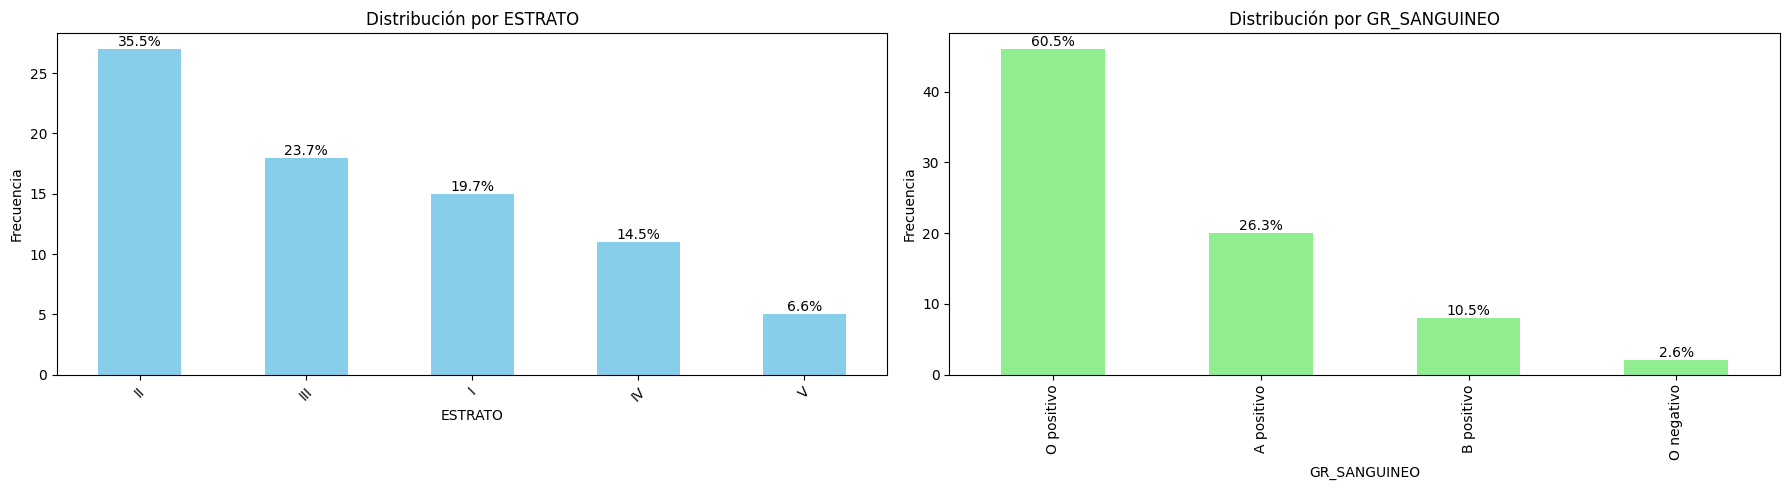

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Creación del DataFrame


# Configuración de la figura y los subplots
fig, axes = plt.subplots(1, 2, figsize=(18, 5))

# Función para agregar etiquetas de porcentaje a las barras
def add_percentage_labels(ax, total_count):
    for p in ax.patches:
        height = p.get_height()
        percentage = height / total_count * 100
        ax.annotate(f'{percentage:.1f}%',
                    (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='bottom', fontsize=10)

# Diagrama de barras para la variable 'CURSO'
curso_counts = df['ESTRATO'].value_counts()
curso_counts.plot(kind='bar', color='skyblue', ax=axes[0])
axes[0].set_title('Distribución por ESTRATO')
axes[0].set_xlabel('ESTRATO')
axes[0].set_ylabel('Frecuencia')
axes[0].tick_params(axis='x', rotation=45)
add_percentage_labels(axes[0], curso_counts.sum())

# Diagrama de barras para la variable 'TRANSPORTE'
transporte_counts = df['GR_SANGUINEO'].value_counts()
transporte_counts.plot(kind='bar', color='lightgreen', ax=axes[1])
axes[1].set_title('Distribución por GR_SANGUINEO')
axes[1].set_xlabel('GR_SANGUINEO')
axes[1].set_ylabel('Frecuencia')
axes[1].tick_params(axis='x', rotation=90)
add_percentage_labels(axes[1], transporte_counts.sum())

# Ajustar el layout
plt.tight_layout()
plt.show()


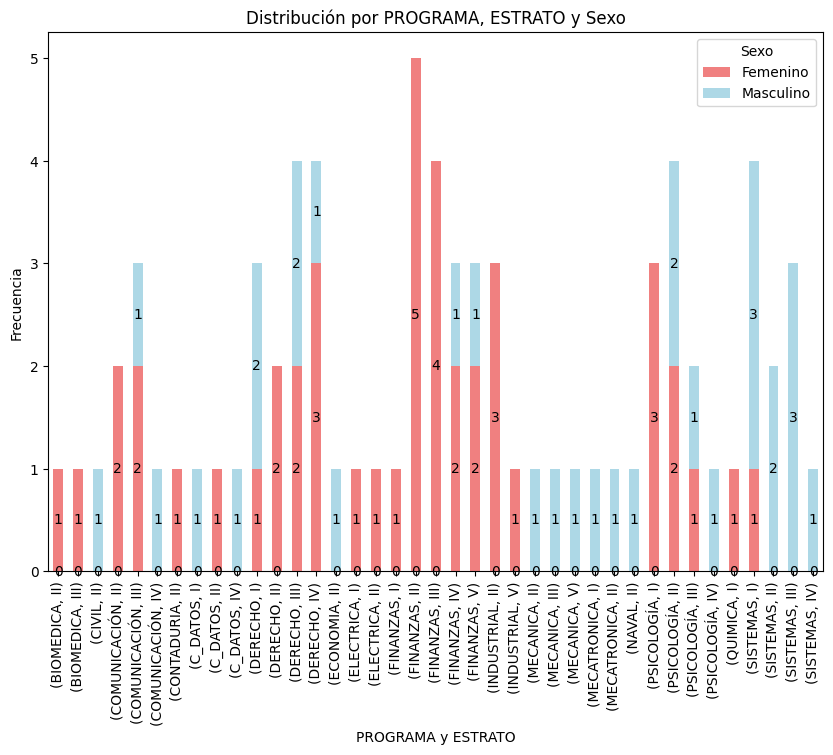

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Creación del DataFrame


# Creación de una tabla de contingencia para las tres variables
contingency_table = pd.crosstab([df['PROGRAMA'], df['ESTRATO']], df['SEXO'])

# Configuración del gráfico
ax = contingency_table.plot(kind='bar', stacked=True, figsize=(10, 7), color=['lightcoral','lightblue' ])
plt.title('Distribución por PROGRAMA, ESTRATO y Sexo')
plt.xlabel('PROGRAMA y ESTRATO')
plt.ylabel('Frecuencia')
plt.xticks(rotation=90)
plt.legend(title='Sexo')

# Añadir etiquetas de datos en las barras
for p in ax.patches:
    width = p.get_width()  # Anchura de la barra
    height = p.get_height()  # Altura de la barra
    x = p.get_x() + width / 2  # Coordenada X del centro de la barra
    y = p.get_y() + height / 2  # Coordenada Y del centro de la barra
    ax.text(x, y, f'{int(height)}', ha='center', va='center')

plt.show()


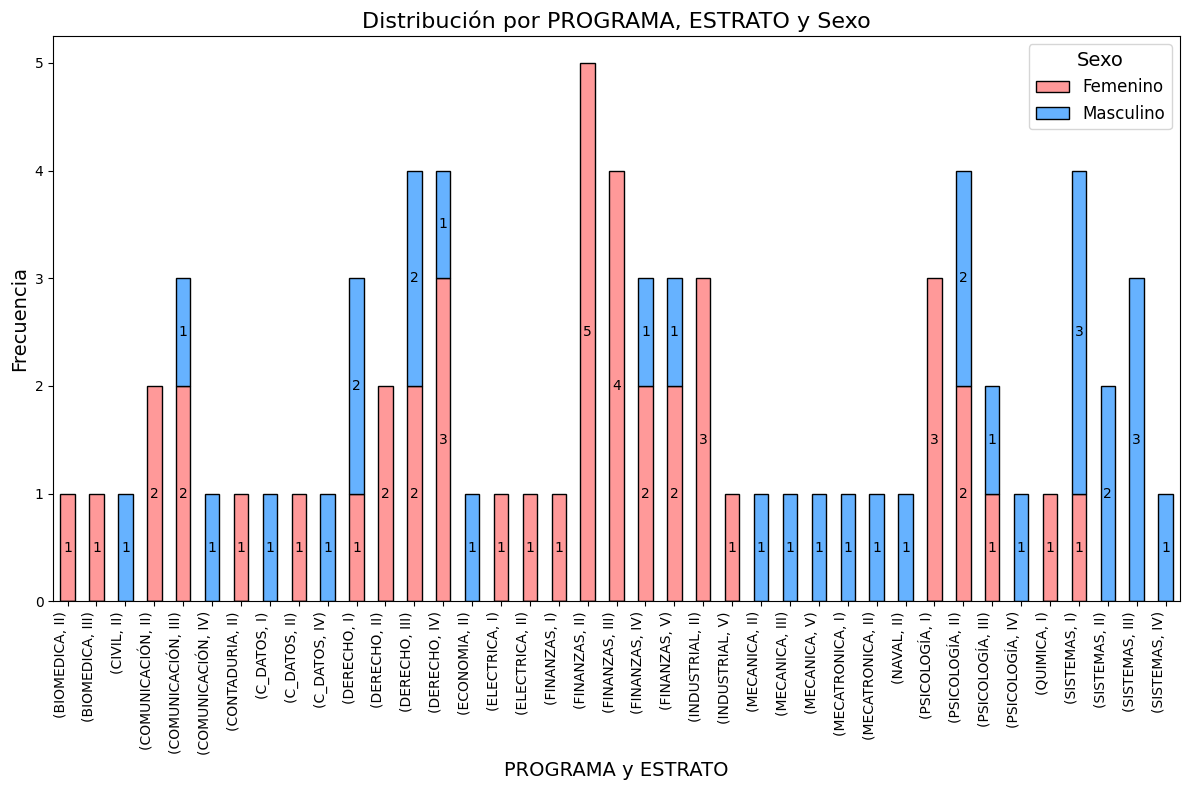

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Creación del DataFrame


# Creación de una tabla de contingencia para las tres variables
contingency_table = pd.crosstab([df['PROGRAMA'], df['ESTRATO']], df['SEXO'])

# Configuración del gráfico
ax = contingency_table.plot(kind='bar', stacked=True, figsize=(12, 8),
                            color=['#FF9999','#66B2FF'], edgecolor='black')

plt.title('Distribución por PROGRAMA, ESTRATO y Sexo', fontsize=16)
plt.xlabel('PROGRAMA y ESTRATO', fontsize=14)
plt.ylabel('Frecuencia', fontsize=14)
plt.xticks(rotation=90, ha='right')
plt.legend(title='Sexo', fontsize=12, title_fontsize=14, loc='upper right')

# Añadir etiquetas de datos en las barras
for p in ax.patches:
    width = p.get_width()  # Anchura de la barra
    height = p.get_height()  # Altura de la barra
    x = p.get_x() + width / 2  # Coordenada X del centro de la barra
    y = p.get_y() + height / 2  # Coordenada Y del centro de la barra
    if height > 0:  # Mostrar etiquetas solo para barras con valor
        ax.text(x, y, f'{int(height)}', ha='center', va='center', fontsize=10, color='black')

plt.tight_layout()  # Ajusta el gráfico para que todo encaje bien
plt.show()


In [ ]:


# **45. Vamos a Exportar nuestro Dataframes a limpios**
df.to_csv('df2.csv',index=False)